# Purpose of Study

To predict whether customers will pay off the loan, utilizing the facts of their demographics, credit and financial status/history, and characteristics of the loan before it is issued. Therefore, variables that contain information collected after the loan is issued are not considered in this study. 

# Import Libraries

In [1]:
#importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import itertools

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#set display 

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', -1)

# The Data

This dataset contains complete loan data for all loans issued by Lending Club through 2007-2015, including the current loan status and latest payment information. Additional features include credit scores, number of finance inquiries, and demographic information (e.g., address, employment and income). A data dictionary is aviable in a separate file. The dataset can be downloaded from [kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data).

In [2]:
#read in data 

lc_df = pd.read_csv('lending-club-loan-data/loan.csv')

pd.options.display.max_columns = 1000

lc_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

# Exploratory Data Analysis

The dataset provides Lending Club's customers' information. It includes 2,260,668 records and 145 fields consisting of 109 numeric variables and 36 categorical variables. 

In [3]:
lc_df.info()
#there are 109 numeric and 36 categorical variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [4]:
print('There are {} columns.'.format(len(lc_df.columns.values)))
#or use list() to show all column names 

There are 145 columns.


## Missing Data

In [3]:
#check missing

total_missing = lc_df.isnull().sum().sort_values(ascending=False)
percent_missing = (lc_df.isnull().sum() / lc_df.isnull().count() * 100).sort_values(ascending=False)

missing0 = pd.concat([total_missing, percent_missing], axis=1, keys=['Total_missing', 'Percent_missing'])

In [4]:
#drop these variables with large amount of missing > 30%
print('{} variables have more than 30% missing.'.format(len(missing0[missing0['Percent_missing'] > 30])))

58 variables have more than 30% missing.


In [5]:
missing0[missing0['Percent_missing'] > 0]

,Total_missing,Percent_missing
id,2260668,100.000000
member_id,2260668,100.000000
url,2260668,100.000000
orig_projected_additional_accrued_interest,2252242,99.627278
hardship_start_date,2250055,99.530537
hardship_end_date,2250055,99.530537
payment_plan_start_date,2250055,99.530537
hardship_length,2250055,99.530537
hardship_dpd,2250055,99.530537
hardship_loan_status,2250055,99.530537


In [6]:
missing0[missing0['Percent_missing']>30].index

Index(['id', 'member_id', 'url', 'orig_projected_additional_accrued_interest',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'hardship_payoff_balance_amount', 'deferral_term',
       'hardship_last_payment_amount', 'hardship_status', 'hardship_reason',
       'hardship_type', 'hardship_amount', 'settlement_percentage',
       'settlement_term', 'settlement_status', 'debt_settlement_flag_date',
       'settlement_amount', 'settlement_date',
       'sec_app_mths_since_last_major_derog', 'sec_app_revol_util',
       'revol_bal_joint', 'sec_app_mort_acc',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
       'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_inq_last_6mths',
       'sec_app_earliest_cr_line', 'verification_status_joint', 'dti_joint',
       'annual_inc_joint', 'desc', 'mths_since_last_record',
       'mt

In [7]:
#drop variables with large amount of missing >30%

lc0 = lc_df.drop(columns=['id', 'member_id', 'url', 'orig_projected_additional_accrued_interest',
                          'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
                          'hardship_length', 'hardship_dpd', 'hardship_loan_status',
                          'hardship_payoff_balance_amount', 'deferral_term',
                          'hardship_last_payment_amount', 'hardship_status', 'hardship_reason',
                          'hardship_type', 'hardship_amount', 'settlement_percentage',
                          'settlement_term', 'settlement_status', 'debt_settlement_flag_date',
                          'settlement_amount', 'settlement_date',
                          'sec_app_mths_since_last_major_derog', 'sec_app_revol_util',
                          'revol_bal_joint', 'sec_app_mort_acc',
                          'sec_app_collections_12_mths_ex_med',
                          'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
                          'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_inq_last_6mths',
                          'sec_app_earliest_cr_line', 'verification_status_joint', 'dti_joint',
                          'annual_inc_joint', 'desc', 'mths_since_last_record',
                          'mths_since_recent_bc_dlq', 'mths_since_last_major_derog',
                          'mths_since_recent_revol_delinq', 'next_pymnt_d',
                          'mths_since_last_delinq', 'il_util', 'mths_since_rcnt_il', 'all_util',
                          'open_acc_6m', 'inq_last_12m', 'total_cu_tl', 'open_act_il',
                          'open_il_12m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
                          'max_bal_bc', 'inq_fi', 'open_il_24m'], axis=1)

#drop variables unrelated to the purpose of study

lc1 = lc0.drop(columns=['collection_recovery_fee','total_rec_late_fee','recoveries', 'policy_code',
                        'out_prncp_inv','out_prncp','total_pymnt_inv','total_pymnt', 'last_pymnt_d',
                        'total_rec_int','total_rec_prncp', 'last_pymnt_amnt','hardship_flag',
                        'debt_settlement_flag', 'funded_amnt', 'funded_amnt_inv', 'installment',
                        'initial_list_status', 'pymnt_plan', 'disbursement_method', 
                        'mths_since_recent_inq', 'issue_d', 'earliest_cr_line',
                        'last_credit_pull_d'], axis=1)

#lc1.head()

In [8]:
len(lc1.columns)

63

## Target Variable

In [9]:
#target variable 
lc1['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                919695 
Charged Off                                            261655 
Late (31-120 days)                                     21897  
In Grace Period                                        8952   
Late (16-30 days)                                      3737   
Does not meet the credit policy. Status:Fully Paid     1988   
Does not meet the credit policy. Status:Charged Off    761    
Default                                                31     
Name: loan_status, dtype: int64

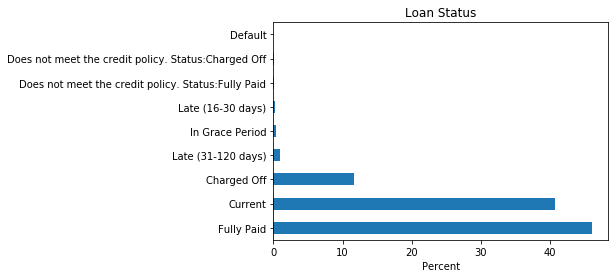

In [10]:
#plot target variable 

status_counts = (lc1['loan_status']
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                )


status_counts.plot(kind='barh', figsize=(6,4))

plt.xlabel('Percent')
plt.ylabel('')
plt.title('Loan Status')

plt.show()

The study is to predict whether the loan will be paid off or not, therefore I only kept 'Fully Paid' and 'Charged Off' two categories, which results in a binary classification. 

In [11]:
#only keep 2 categories for loan_status 

lc2 = lc1[(lc1['loan_status']=='Fully Paid') | (lc1['loan_status']=='Charged Off')]

lc2['loan_status'].value_counts()

Fully Paid     1041952
Charged Off    261655 
Name: loan_status, dtype: int64

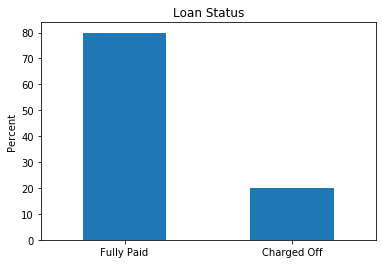

In [13]:
status_counts = (lc2['loan_status']
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                )

status_counts.plot(kind='bar', figsize=(6,4))

plt.xticks(rotation=360)
plt.ylabel('Percent')
plt.title('Loan Status')

plt.show()

The classes of target variable are imbalanced, and the ratio of Fully Paid to Charged Off instances is 4:1. 

In [12]:
#change loan_status to target as binary 

target = []

for i in lc2['loan_status']:
    if i=='Fully Paid':
        target.append(1)
    else: target.append(0)
        
lc2['target'] = target

lc2['target'].value_counts()

1    1041952
0    261655 
Name: target, dtype: int64

In [13]:
n_no_paid = len(lc2[lc2['target']==0])
n_paid = len(lc2[lc2['target']==1])
tot = len(lc2['target'])

pct_paid = n_paid/tot

print("Percent of Fully Paid is", pct_paid * 100)

pct_no_paid = n_no_paid/tot

print("Percent of Charged Off is", pct_no_paid * 100)

Percent of Fully Paid is 79.92838332411532
Percent of Charged Off is 20.07161667588468


In [14]:
lc2.groupby('loan_status').mean()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,15548.979381,15.712087,70327.779235,20.161590,0.352697,0.781349,11.906472,0.247203,15365.308341,54.896443,24.747675,0.021697,0.005702,239.144981,118733.326394,28892.165216,5.328011,10914.851459,7619.201372,63.842746,0.009754,19.638352,123.108295,172.019357,11.336164,6.882099,1.375371,20.644661,0.536181,3.829345,6.114329,4.815806,7.951424,8.670812,8.582023,14.558091,6.043551,11.938052,0.000911,0.003764,0.099090,2.494885,93.991224,50.212243,0.153561,0.060033,146422.863299,49299.607079,18481.549294,41989.374979,0.0
Fully Paid,14132.493699,12.640755,77623.326376,17.780909,0.308802,0.628439,11.513452,0.207566,16454.632823,51.160233,25.087058,0.015809,0.004911,252.066672,146783.162129,33682.116683,4.535874,14144.311421,10762.320735,59.112734,0.008910,13.905276,126.530033,183.918685,13.533208,8.086805,1.753570,24.589483,0.502555,3.595094,5.526572,4.711463,8.166126,8.549684,8.204690,14.662739,5.481436,11.564958,0.000804,0.003352,0.086364,2.101143,94.218441,44.074606,0.129961,0.049967,181303.742353,49693.781130,22351.126092,42086.515349,1.0


### Observations:

As expected,  add magnitude of differnces in percent

+ The average loan amount of customers who paid off is 10% lower than that of the customers who didn't. 
+ The average interest rate of customers who paid off is 24% lower than that of the customers who didn't.
+ The average annual income of customers who paid off is 10% higher than that of the customers who didn't.
+ The average delinquency amount of customers who paid off is 41% lower than that of the customers who didn't.

Surprisingly, 

+ The average revolving balance of customers who paid off is 7% higher than that of the customers who didn't.

+ The average current balance of all accounts of customers who paid off is 24% higher than that of the customers who didn't.

## Recheck Variables for Updated Dataset

After removing unrelated variables and variables with large amount of missing values, the current dataset contains 68 fields where there are 46 variables with missing values, ranging from 0.00008 to 13 percent missing. 

In [15]:
#categorical variables 

cat = lc2.select_dtypes(['object']).columns

print('There are {} categorical variables.'.format(len(cat)))
print('')
print(cat)

There are 13 categorical variables.

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'zip_code', 'addr_state', 'application_type'],
      dtype='object')


In [16]:
#numeric variables 

notar = lc2.drop(['target'], axis=1)

num = notar.select_dtypes(['int64', 'float64']).columns

print('There are {} numeric variables.'.format(len(num)))
print('')
print(num.values)

There are 50 numeric variables.

['loan_amnt' 'int_rate' 'annual_inc' 'dti' 'delinq_2yrs' 'inq_last_6mths'
 'open_acc' 'pub_rec' 'revol_bal' 'revol_util' 'total_acc'
 'collections_12_mths_ex_med' 'acc_now_delinq' 'tot_coll_amt'
 'tot_cur_bal' 'total_rev_hi_lim' 'acc_open_past_24mths' 'avg_cur_bal'
 'bc_open_to_buy' 'bc_util' 'chargeoff_within_12_mths' 'delinq_amnt'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'num_accts_ever_120_pd' 'num_actv_bc_tl' 'num_actv_rev_tl' 'num_bc_sats'
 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl' 'num_rev_accts'
 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m' 'num_tl_30dpd'
 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'pub_rec_bankruptcies' 'tax_liens' 'tot_hi_cred_lim'
 'total_bal_ex_mort' 'total_bc_limit' 'total_il_high_credit_limit']


## Categorical Variables

### Loan Term

In [87]:
lc2.groupby('term').mean()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
term,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36 months,12543.764627,12.133027,74182.783308,17.885764,0.321932,0.648369,11.371955,0.222264,15321.504200,51.035090,24.349735,0.017687,0.005071,258.026383,131839.334889,31549.082790,4.606817,12775.580078,10052.379208,59.302855,0.009177,15.390287,124.095393,179.75009,13.076823,7.963481,1.562821,23.725573,0.521534,3.586784,5.551649,4.656747,7.991529,8.266344,8.151694,14.392322,5.502859,11.414289,0.000834,0.003440,0.092164,2.154190,93.948951,44.375510,0.137061,0.054722,164201.083789,47006.232964,20866.806935,40074.695457,0.839041
60 months,20298.840491,16.787603,82365.013236,19.430306,0.304047,0.692929,12.284418,0.194351,19107.801955,54.657663,27.120482,0.014804,0.005066,222.523464,170042.927234,36341.198785,4.979088,15719.595323,10354.480228,62.486569,0.008772,14.006203,131.190240,186.98148,13.116733,7.460595,2.036202,23.992205,0.471335,3.818070,5.942078,4.971317,8.532893,9.539622,8.688014,15.422367,5.886842,12.352692,0.000799,0.003422,0.078880,2.265878,94.872124,48.282012,0.127285,0.043401,205587.563792,57829.123842,23770.542857,48310.768945,0.674432


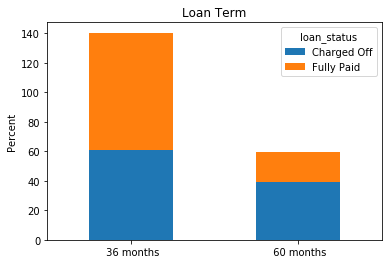

In [88]:
#loan term
term_counts = (lc2.groupby(['loan_status'])['term'] 
               .value_counts(normalize=True)
               .rename('Percent')
               .mul(100)
               .reset_index()
               .pivot(columns='loan_status', index='term', values='Percent')
               .sort_values(['Fully Paid'], ascending=False)
              )

term_counts.plot(kind='bar', stacked=True, figsize=(6,4))

plt.xlabel('')
plt.ylabel('Percent')
plt.xticks(rotation=360)
plt.title('Loan Term')

plt.show()

### Loan Grade

In [89]:
lc2.groupby('grade').mean() 

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,13874.844747,7.124555,88830.115809,15.598087,0.189672,0.384861,11.929912,0.110916,18233.582674,38.859578,26.503954,0.008651,0.001613,140.996369,177837.050870,48087.747375,3.792139,16919.119879,20981.488318,43.812118,0.004805,4.944812,132.744631,206.272502,16.364202,9.694711,2.068717,28.312934,0.325261,3.569823,5.099821,5.183643,9.058050,8.724201,8.544455,15.666753,5.071676,12.066166,0.000253,0.001183,0.045445,1.622276,96.208762,25.889163,0.063591,0.034068,230098.028798,52111.245986,34065.810978,44907.601050,0.939154
B,13227.951319,10.688107,76360.338387,17.362793,0.322489,0.536034,11.412509,0.220706,16010.599771,50.728681,24.946101,0.017525,0.004693,261.392392,140440.802895,32601.187975,4.297475,13629.679100,10130.318653,58.729941,0.009357,12.672105,127.435116,186.870531,13.916876,8.533143,1.704026,25.135589,0.524663,3.615115,5.515157,4.717803,8.268534,8.353983,8.195117,14.787097,5.468666,11.462942,0.000882,0.003022,0.090941,1.920829,93.944489,42.858734,0.141276,0.051646,173897.298859,47798.544014,21669.347356,40605.019230,0.865641
C,14177.030733,14.020655,72669.595690,18.883729,0.351393,0.710949,11.487930,0.246172,15683.647199,55.255274,24.506188,0.019323,0.006042,289.116423,131853.761643,28852.630201,4.909693,12651.896078,7399.035079,64.310194,0.010354,18.991944,123.859617,174.516348,12.278156,7.376232,1.570765,22.582912,0.553397,3.660332,5.774859,4.617648,7.825520,8.500379,8.188272,14.287101,5.718172,11.501660,0.000906,0.004140,0.100483,2.299201,93.611556,50.480614,0.154469,0.058180,160190.491453,48836.853481,18450.892076,41156.700906,0.774924
D,15262.672445,17.700315,70094.871608,20.148099,0.364769,0.867815,11.546267,0.248889,15407.379245,57.983691,24.384397,0.019936,0.006473,283.630617,126005.172427,26745.278741,5.305930,11949.556480,5942.608480,67.443042,0.010544,21.641366,121.991378,168.097285,11.206925,6.614366,1.484325,21.061863,0.565040,3.688206,5.958405,4.558131,7.645570,8.666016,8.223974,14.113304,5.892351,11.578167,0.000988,0.004464,0.105198,2.582632,93.557397,54.843276,0.154384,0.058434,151548.815630,49605.684287,16581.233047,41928.679729,0.695611
E,17639.881784,21.102467,72055.147604,20.767477,0.354952,0.967872,11.816621,0.243584,16239.614022,59.112669,24.994649,0.018893,0.007109,227.965967,130173.427973,27261.567262,5.689220,12071.206274,5707.997087,68.336590,0.010102,18.329092,121.602416,166.064954,10.650565,6.150726,1.537235,20.154809,0.561889,3.714807,6.081787,4.599531,7.700868,8.967643,8.398923,14.314070,6.017889,11.853529,0.001312,0.004558,0.099401,2.815345,93.879296,56.287985,0.153450,0.055336,155605.432657,52335.194409,16607.771585,43841.127716,0.613804
F,19102.572023,24.898567,73178.064607,20.938659,0.360734,1.140139,11.996824,0.246069,16115.283709,60.061225,25.165613,0.018551,0.007178,249.917914,129173.476298,26562.233633,6.110590,11867.390586,5376.749815,69.478473,0.009625,18.207795,119.752420,161.763446,9.747062,5.507890,1.507418,19.066115,0.562915,3.751695,6.157524,4.616549,7.700329,9.108037,8.503894,14.306016,6.107869,12.023446,0.000871,0.005237,0.095515,3.106124,94.025571,57.853390,0.150915,0.059526,153441.815114,53290.613613,16098.024385,44765.438360,0.546962
G,20608.208580,27.688071,76311.964522,21.438

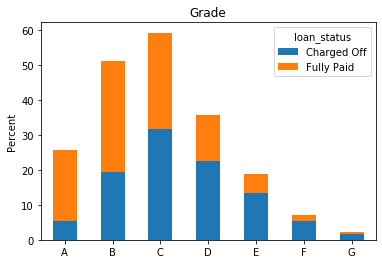

In [90]:
#grade: has a corresponding interest rate A-G low-high
grade_counts = (lc2.groupby(['loan_status'])['grade'] 
                .value_counts(normalize=True)
                .rename('Percent')
                .mul(100)
                .reset_index()
                .pivot(columns='loan_status', index='grade', values='Percent')
                .sort_values(['grade'], ascending=True)
               )

grade_counts.plot(kind='bar', stacked=True, figsize=(6,4))

plt.xlabel('')
plt.ylabel('Percent')
plt.xticks(rotation=360)
plt.title('Grade')

plt.show()

### Loan Sub-Grade

In [96]:
lc2.groupby('sub_grade').mean()
#Hobson: change sub_grade to ordinal? 

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
sub_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1,13966.985191,5.547684,421.723163,99360.183710,14.122898,0.117844,0.276940,12.479301,0.060497,18647.733458,29.668064,27.856973,0.005405,0.000994,69.338356,204709.254746,0.698806,2.643531,0.441206,1.309694,35341.885905,0.933149,2.052146,6544.438285,39.749439,60983.661951,0.662982,1.654013,1.365542,3.538804,19169.183544,31933.984931,32.485637,0.002472,1.088322,136.333126,218.430768,17.633782,10.255744,2.329422,29.613753,8.959844,0.189480,3.521158,4.841938,5.585904,9.608658,9.131479,8.860922,16.244896,4.822289,12.580276,0.000156,0.000691,0.021670,1.452822,97.574339,14.856929,0.029651,0.022881,273906.684619,53757.120870,44830.129262,48397.383104,0.967037
A2,13359.390363,6.520117,408.294108,89026.127758,15.193347,0.145726,0.354358,12.060922,0.082374,18135.390559,34.928211,26.642151,0.006622,0.000670,105.096128,183190.618858,0.746331,2.660360,0.507482,1.375180,33969.102806,1.011799,2.233165,6105.474317,42.964165,51361.615155,0.745683,1.561799,1.502446,3.708529,17502.301632,23922.876133,39.168146,0.003521,0.589218,133.005764,208.263487,16.811025,9.955142,2.096813,28.723714,8.519678,0.247832,3.552113,4.982539,5.303370,9.130780,8.765143,8.598717,15.677776,4.954510,12.197972,0.000061,0.000632,0.030287,1.553860,96.893114,21.142702,0.044926,0.028415,239485.376264,51945.358627,36997.508092,45137.205564,0.953101
A3,13615.150687,7.122715,419.765873,88289.739836,15.773491,0.185797,0.408099,11.912785,0.112435,18218.672150,38.235265,26.561873,0.008307,0.001967,152.149245,180597.237724,0.806788,2.699489,0.573577,1.471825,35083.041825,1.097664,2.373066,6030.514599,45.748211,47418.253064,0.819927,1.618540,1.658978,3.822342,17087.770815,20297.560203,43.262807,0.004754,10.456843,132.478319,207.428033,16.328072,9.644394,2.091226,28.417092,8.218219,0.329526,3.562917,5.092069,5.178073,9.076254,8.742070,8.523811,15.727176,5.053497,12.059015,0.000305,0.001484,0.044714,1.645313,96.205525,25.037972,0.064004,0.035630,232692.934368,52256.121702,33452.657786,45039.802985,0.944671
A4,14028.810028,7.514197,429.888055,85814.903113,15.971603,0.216180,0.412883,11.676076,0.127737,17916.266064,41.882895,26.024467,0.009542,0.002098,165.882018,168707.289573,0.825455,2.680520,0.588391,1.465650,34510.180138,1.113675,2.432625,5999.786955,48.162447,43923.856121,0.816978,1.616530,1.692059,3.868394,16188.000503,17480.823088,47.548880,0.005563,6.358981,132.029804,203.917102,15.996982,9.448216,2.009238,28.145832,8.156503,0.380979,3.565979,5.166320,5.045762,8.924036,8.519084,8.447779,15.549421,5.136355,11.857624,0.000425,0.001684,0.054376,1.679149,95.666465,29.436805,0.073641,0.038009,215527.282443,51158.490219,30537.835785,43547.086572,0.931213
A5,14138.720838,8.205317,429.774732,84490.246084,16.404701,0.243475,0.437681,11.705855,0.146307,18281.983711,45.145317,25.880969,0.011456,0.001966,183.844343,162220.004406,0.840596,2.751520,0.598146,1.464126,35395.572203,1.159404,2.522700,6108.579854,51.130530,41178.214131,0.867248,1.579651,1.779337,3.933124,15544.082632,15040.036795,51.523002,0.006509,5.61

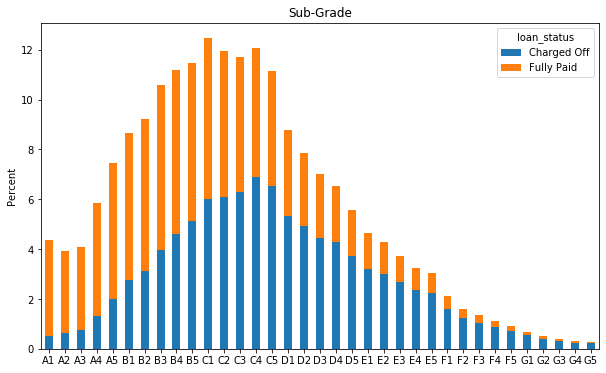

In [28]:
#sub_grade sort by category
#line plot
subgrd_counts = (lc2.groupby(['loan_status'])['sub_grade'] 
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                 .reset_index()
                 .pivot(columns='loan_status', index='sub_grade', values='Percent')
                 .sort_values(['sub_grade'], ascending=True)
                )

subgrd_counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel('')
plt.xticks(rotation=360)
plt.ylabel('Percent')
plt.title("Sub-Grade")

plt.show()

### Employment Title

In [719]:
len(lc2['emp_title'].unique())

371436

In [98]:
emp_title = pd.DataFrame(lc2['emp_title'].value_counts())

emp_title.columns=['Count']

print('There are {} job titles.'.format(len(emp_title.index)))
print('')

#change all to sentence case 
print(emp_title)

There are 371435 job titles.

                                      Count
Teacher                               20496
Manager                               18704
Owner                                  9803
Registered Nurse                       8477
RN                                     8253
Supervisor                             8012
Driver                                 7230
Sales                                  7213
Project Manager                        6154
Office Manager                         5345
General Manager                        5013
Director                               4861
owner                                  4405
manager                                4378
Engineer                               4134
President                              3992
teacher                                3954
Vice President                         3414
driver                                 3403
Operations Manager                     3342
Accountant                             3200
Ad

### Employment Length 

In [99]:
lc2.groupby('emp_length').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
emp_length,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1 year,13468.011543,13.290573,413.239477,71503.640972,17.715646,0.331816,0.662395,11.416226,0.178811,14151.146212,51.220578,23.743910,0.019366,0.004669,324.262082,121465.804159,1.029193,3.359266,0.751620,1.692907,39575.398983,1.398745,2.968993,5174.775403,60.537343,29191.111772,1.078572,1.318984,2.368185,4.597460,11600.946725,9555.093258,59.416547,0.008650,13.525964,118.296758,156.906614,12.759870,7.864151,1.209110,22.416973,6.652970,0.480558,3.426069,5.121872,4.482667,7.450754,9.274145,7.635588,13.198052,5.078875,11.498942,0.000888,0.003106,0.099448,2.135526,94.355598,44.650868,0.112905,0.042944,149071.546078,52394.945207,20099.124472,45469.069086,0.793515
10+ years,15619.221696,13.208180,469.418886,83966.898274,18.421406,0.359923,0.656795,11.993896,0.228199,19166.871046,53.266670,26.915272,0.016169,0.006247,256.427337,164159.817764,1.089227,2.473632,0.836823,1.875135,34735.552428,1.440220,3.012025,6040.023130,57.671121,37074.208311,1.119267,1.965137,2.318627,4.775917,15528.646854,10754.510033,61.224071,0.010830,18.363801,134.573246,205.839697,13.543281,7.748532,2.211086,25.496020,6.689471,0.538850,3.847566,6.134881,4.974616,8.803797,8.348658,8.887045,16.137356,6.074833,11.998551,0.000995,0.004258,0.093512,2.236518,93.828627,46.668471,0.140329,0.055805,203380.599665,50452.456616,23620.542532,41424.503586,0.811160
2 years,13764.431124,13.264982,421.317415,73686.856436,17.743395,0.329206,0.660525,11.473502,0.185800,14466.771134,50.936894,23.881285,0.018801,0.004227,268.159092,127742.080908,1.045015,3.319235,0.767272,1.706122,40421.141981,1.438708,3.053322,5233.986126,60.204375,29836.212029,1.142112,1.348962,2.417158,4.677787,12202.485423,9793.443010,59.025433,0.007851,15.841037,118.463931,157.998674,12.755470,7.824640,1.265192,22.379060,6.689555,0.488681,3.470382,5.201319,4.538213,7.550461,9.177192,7.743055,13.367981,5.157675,11.555720,0.000813,0.002878,0.101156,2.162990,94.299279,43.989465,0.117262,0.045053,156289.954425,52753.934381,20443.884262,45818.033358,0.800738
3 years,13875.904031,13.239929,424.916326,74704.461659,17.795482,0.296152,0.662265,11.463954,0.197342,14531.967572,50.948585,23.918618,0.018811,0.004443,237.913909,130049.197395,1.042713,3.211691,0.765435,1.714011,39331.450674,1.430785,3.060628,5250.850318,59.602063,30139.543770,1.110102,1.371687,2.362212,4.722305,12433.184223,9804.186637,59.021922,0.007870,14.770288,118.654093,158.745347,12.624017,7.747386,1.299761,22.191446,6.703854,0.516987,3.497516,5.273695,4.577608,7.605251,9.047294,7.818373,13.485379,5.229502,11.546688,0.000709,0.003060,0.092894,2.181637,94.131755,43.854942,0.123431,0.048283,159464.258906,51629.834814,20441.850637,45012.277377,0.799107
4 years,14015.590998,13.275999,428.394396,75082.629615,17.924976,0.274834,0.667585,11.496085,0.206885,14640.506376,50.932072,23.985980,0.017379,0.004037,242.697761,132781.007350,1.054986,3.116708,0.787291,1.752281,38822.430131,1.447387,3.096964,5316.610287,58.951580,30440.879972,1.131010,1.409922,2.409225,4.797798,12647.189053,9937

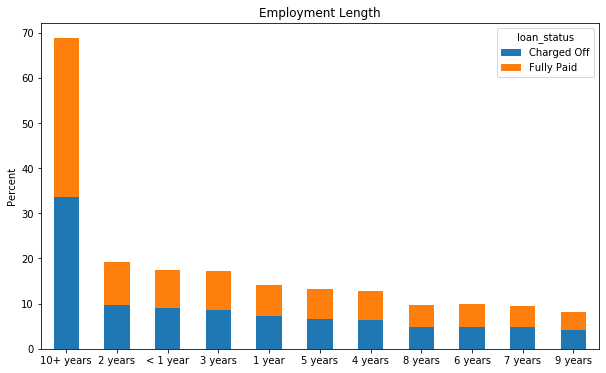

In [712]:
emplen_counts = (lc2.groupby(['loan_status'])['emp_length'] 
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                 .reset_index()
                 .pivot(columns='loan_status', index='emp_length', values='Percent')
                 .sort_values(['Charged Off'], ascending=False)
                )

emplen_counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel('')
plt.xticks(rotation=360)
plt.ylabel('Percent')
plt.title("Employment Length")

plt.show()

### Home Ownership

In [101]:
lc2.groupby('home_ownership').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
home_ownership,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANY,13931.273408,13.684270,433.955506,80187.091648,18.576667,0.295880,0.520599,12.134831,0.295880,14846.280899,43.937594,26.089888,0.014981,0.007491,213.213483,164897.022472,1.018939,2.996212,0.662879,1.795455,38092.768939,1.295455,2.696970,5702.166667,55.109848,35034.779026,1.015152,1.928030,2.075758,4.842697,14936.880150,13445.857692,51.053668,0.007491,6.531835,126.103846,188.138577,13.760300,8.007491,1.670412,22.007692,6.794979,0.434457,3.513109,5.273408,4.760300,7.868914,9.752809,8.419476,14.449438,5.280899,12.101124,0.000000,0.007491,0.052434,2.123596,94.856554,31.636154,0.127341,0.149813,204337.235955,53628.996255,24647.940075,49109.262172,0.805243
MORTGAGE,15968.927693,12.934613,476.582064,86094.939940,18.337687,0.356067,0.686775,12.278985,0.211902,19574.838462,52.631518,27.522451,0.015880,0.006141,256.856872,218298.071612,1.118249,2.787055,0.830334,1.875300,39326.970693,1.409010,2.949933,6217.075284,58.320430,38039.651368,1.239922,1.936058,2.576729,4.897206,20673.891988,11204.956306,60.585705,0.009602,14.609290,133.494795,196.534190,13.279182,7.411291,2.644311,24.812422,6.418728,0.512859,3.725334,5.861613,4.873851,8.555158,9.093393,8.587270,15.584015,5.802044,12.299569,0.000814,0.004450,0.088578,2.274658,94.080397,45.801291,0.130651,0.051374,260724.394052,55394.716297,24280.638656,46209.309456,0.827014
NONE,14074.479167,14.834167,459.426250,62798.979167,20.750000,0.416667,0.458333,11.062500,0.020833,15925.708333,59.945833,22.562500,0.000000,0.000000,28.666667,113624.622222,0.666667,1.333333,0.666667,1.333333,16773.000000,1.000000,4.333333,5397.333333,44.333333,27924.888889,0.000000,1.000000,1.666667,3.422222,10992.711111,6432.477273,75.359091,0.000000,0.000000,129.536585,204.600000,15.133333,10.866667,1.844444,30.931818,8.885714,0.400000,3.755556,6.088889,4.622222,8.933333,6.266667,8.511111,14.822222,6.088889,11.333333,0.000000,0.000000,0.088889,1.666667,90.528889,64.479545,0.000000,0.021739,141317.844444,38414.577778,17961.377778,29791.222222,0.854167
OTHER,11718.750000,13.150417,378.480833,68374.180556,14.344167,0.291667,0.965278,9.548611,0.027778,13373.347222,51.945775,22.562500,0.000000,0.000000,0.000000,107306.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24091.644444,NaN,NaN,NaN,3.844444,11145.488889,3636.295455,79.415909,0.000000,0.000000,126.790698,190.777778,12.644444,6.888889,1.555556,24.045455,6.600000,0.288889,4.200000,6.800000,4.711111,8.822222,7.622222,8.444444,14.511111,6.800000,11.000000,0.000000,0.000000,0.022222,1.933333,95.088889,67.204545,0.020833,0.000000,126982.577778,37508.622222,14856.088889,28294.377778,0.812500
OWN,13845.828745,13.305197,425.113156,71158.094756,18.691719,0.320736,0.660043,11.495109,0.217757,16588.569678,48.394530,24.734383,0.018285,0.005363,288.326820,112549.137415,1.078269,2.459955,0.745909,1.649815,31589.814093,1.507789,3.164836,5378.978469,55.076952,35652.150111,1.075367,1.525909,2.292250,4.729035,10824.591169,11924.225596,56.080589,0.009182,16.858528,123.930918,195.448239,12.849554,7.961166,1.3

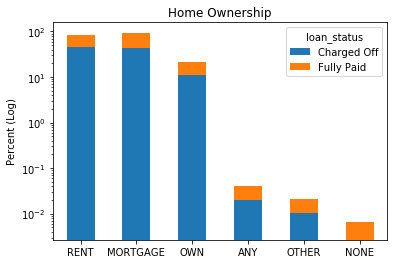

In [102]:
#home ownership
homeow_counts = (lc2.groupby(['loan_status'])['home_ownership'] 
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                 .reset_index()
                 .pivot(columns='loan_status', index='home_ownership', values='Percent')
                 .sort_values(['Charged Off'], ascending=False)
                )

homeow_counts.plot(kind='bar', stacked=True, figsize=(6,4))

plt.xlabel('')
plt.xticks(rotation=360)
plt.ylabel('Percent (Log)')
plt.yscale('log')
plt.title("Home Ownership")

plt.show()

### Income Verification

In [103]:
lc2.groupby('verification_status').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
verification_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Not Verified,11643.212351,11.648100,355.564069,69627.308460,17.630591,0.293362,0.575679,11.521972,0.168448,14014.587624,47.964701,24.751288,0.012786,0.003297,232.621447,135072.268101,0.935336,2.782291,0.675255,1.639326,34887.373988,1.257598,2.710666,5472.817611,53.120854,32448.844750,0.988683,1.591768,2.036428,4.317286,13080.708612,11797.648374,55.638204,0.006092,7.426167,126.028551,182.227175,13.552839,8.191025,1.634486,24.584574,7.152054,0.462232,3.522698,5.430505,4.684996,8.074839,8.545283,8.211247,14.564213,5.392336,11.622154,0.000305,0.002928,0.079837,1.910775,94.348148,40.200139,0.114828,0.033068,170194.601138,46352.791350,21864.950576,41086.345544,0.852888
Source Verified,14753.128983,13.290137,445.750979,80522.123333,17.508544,0.340288,0.639130,11.466676,0.245969,16196.137458,52.297618,24.601903,0.020152,0.005374,262.817699,137064.858686,1.059187,2.783198,0.755183,1.701844,35564.315329,1.454169,3.080195,5394.434885,59.443043,31982.914985,1.129850,1.557096,2.395101,4.705930,13170.715312,9704.537675,60.523781,0.010081,13.055723,124.808028,176.744929,12.813966,7.731528,1.600981,23.332881,6.656815,0.559462,3.591835,5.537065,4.600615,7.909502,8.545249,8.154770,14.294601,5.525822,11.498858,0.000745,0.003711,0.092993,2.168049,93.874367,45.512572,0.146201,0.065083,168945.672973,49892.819364,21070.396879,42081.867510,0.788820
Verified,16669.579580,14.764606,508.002096,77051.701908,19.789624,0.312925,0.764129,11.815299,0.223189,18422.326693,55.227800,25.791722,0.017129,0.006400,248.495036,151853.884149,1.188321,2.835748,0.944955,1.967666,37788.832782,1.577581,3.272670,5782.286383,62.074343,33870.649712,1.176791,1.754529,2.556826,5.045349,14274.351589,9058.184543,63.731850,0.010714,24.867826,126.958420,186.815596,12.988224,7.649867,1.812226,23.605297,6.345267,0.490883,3.820938,5.988424,4.943667,8.436774,8.638588,8.508031,15.153054,5.877100,11.836399,0.001442,0.003571,0.092494,2.454470,94.381692,49.954245,0.139570,0.054006,184676.689131,52365.699290,21903.668648,42978.117107,0.760643


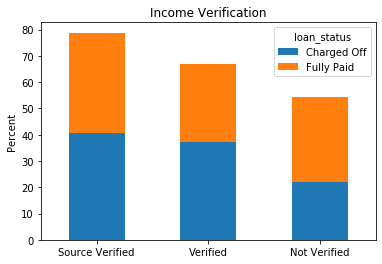

In [104]:
#whether co-borrower's income was verified by LC: combine categories 
income_counts = (lc2.groupby(['loan_status'])['verification_status'] 
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                 .reset_index()
                 .pivot(columns='loan_status', index='verification_status', values='Percent')
                 .sort_values(['Charged Off'], ascending=False)
                )

income_counts.plot(kind='bar', stacked=True, figsize=(6,4))

plt.xlabel('')
plt.xticks(rotation=360)
plt.ylabel('Percent')
plt.title("Income Verification")

plt.show()

### Customer Location: State

In [107]:
# 51 states: borrower's location 
state = lc2['addr_state'].value_counts().index

print('Borrowers are from {} states, DC was also included.'.format(len(state)))
print('\n')
print(state)

Borrowers are from 51 states, DC was also included.


Index(['CA', 'TX', 'NY', 'FL', 'IL', 'NJ', 'PA', 'OH', 'GA', 'VA', 'NC', 'MI',
       'AZ', 'MD', 'MA', 'CO', 'WA', 'MN', 'IN', 'MO', 'TN', 'NV', 'CT', 'WI',
       'AL', 'OR', 'SC', 'LA', 'KY', 'OK', 'KS', 'UT', 'AR', 'NM', 'HI', 'MS',
       'NH', 'RI', 'WV', 'MT', 'DE', 'NE', 'DC', 'AK', 'WY', 'SD', 'VT', 'ME',
       'ID', 'ND', 'IA'],
      dtype='object')


In [106]:
lc2.groupby('addr_state').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
addr_state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,16439.142719,13.504075,507.255767,77506.237685,18.627264,0.264772,0.714562,10.567323,0.098482,18045.687439,60.162112,23.607039,0.012270,0.002583,215.282549,162094.267894,0.878957,2.830540,0.764432,1.706704,38478.656425,1.090317,2.311918,6553.556797,61.755121,32025.992161,0.705773,4.648045,2.048417,4.131394,16972.516701,9139.201157,65.559332,0.004198,3.259283,126.223744,173.168712,16.055215,8.906612,1.622869,27.178790,6.818216,0.397751,3.477505,5.172120,4.357529,7.555556,8.815951,7.158487,12.972393,5.157805,10.576637,0.000348,0.002045,0.065099,1.859237,94.415031,51.102042,0.061693,0.021957,193937.105658,53674.941825,21895.543297,45581.453647,0.800775
AL,13964.419679,13.738734,420.783413,68889.198268,20.122583,0.345589,0.670035,11.311861,0.227912,14581.919338,53.072203,26.358795,0.020770,0.004898,192.960274,135364.636796,1.113895,3.000000,0.973298,2.175869,39419.693753,1.354871,2.828086,5105.025218,60.785067,28595.828720,1.303775,2.210977,2.338058,4.940882,13336.602866,8042.580662,62.374437,0.009114,7.859012,130.692287,184.780528,13.510387,7.309085,1.974288,25.915129,6.559947,0.502833,3.215760,5.326408,4.145421,7.351807,10.267535,7.700684,14.017388,5.273331,11.333893,0.000476,0.003582,0.088961,2.302051,93.975103,48.351841,0.137018,0.055986,165791.377988,51076.336561,18124.125224,45457.834777,0.762664
AR,13494.082200,13.516203,409.811367,66466.122304,20.135846,0.320663,0.783272,11.285538,0.261640,13377.860527,51.555093,25.616811,0.018026,0.005562,175.739630,123788.314091,1.033611,2.777360,0.843237,1.860984,38107.220220,1.355203,2.865286,4788.316214,59.217321,27654.188563,1.472439,1.284754,3.227212,4.701307,12182.255605,8500.561956,61.024495,0.008550,7.278945,131.200729,179.262970,13.388389,7.758800,1.924238,24.377618,6.249269,0.451749,3.511210,5.453482,4.495985,7.750569,9.669230,7.884978,13.898516,5.397487,11.296713,0.000791,0.003141,0.079606,2.147948,94.290260,47.308775,0.128078,0.102493,153828.619950,48421.203698,18539.005207,44061.817394,0.758344
AZ,13898.844432,13.107068,421.768384,72717.153527,18.410886,0.270116,0.627980,11.126908,0.228497,15246.566055,50.849733,24.566686,0.016932,0.004288,305.755166,146081.470464,1.040104,2.747234,0.751306,1.720267,37797.135833,1.396512,2.986478,5335.172403,58.379899,31213.502417,1.021819,1.749923,2.397895,4.716256,14329.573330,9951.150239,59.013136,0.009901,12.287268,126.520360,181.523642,12.874570,7.749967,2.070732,23.005756,6.725336,0.625066,3.558642,5.353874,4.656995,7.945563,8.306755,7.875232,14.091523,5.304901,11.172848,0.000928,0.002583,0.089205,2.179272,94.062821,43.819913,0.174111,0.031151,177070.256821,50191.650807,20752.103310,43401.687517,0.803222
CA,14672.968796,13.175237,449.650229,81899.874799,16.833858,0.283481,0.619456,11.123597,0.216864,16700.853653,51.946419,23.268646,0.012789,0.004350,244.984242,149564.878017,1.019672,2.479532,0.735401,1.653134,33108.649557,1.408517,3.022799,5663.533959,56.826233,33472.358504,1.058595,1.441821,2.159914,4.524623,14756.880544,10459.978971,59.842101,0.009255,1

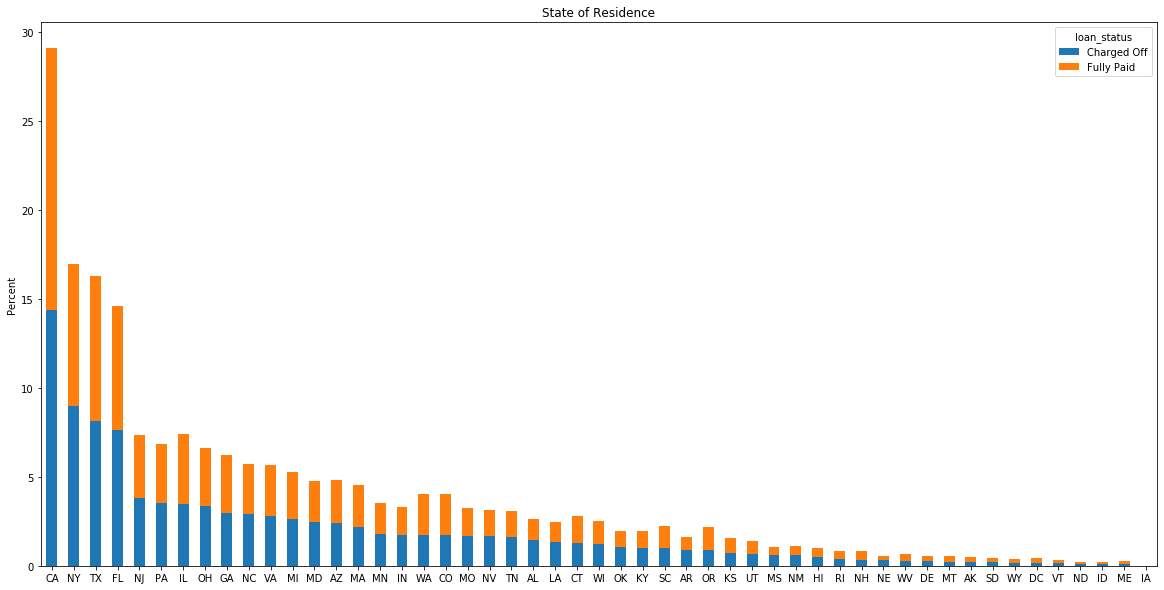

In [31]:
state_counts = (lc2.groupby(['loan_status'])['addr_state'] 
                .value_counts(normalize=True)
                .rename('Percent')
                .mul(100)
                .reset_index()
                .pivot(columns='loan_status', index='addr_state', values='Percent')
                .sort_values(['Charged Off'], ascending=False)
               )

state_counts.plot(kind='bar', stacked=True, figsize=(20,10))

plt.xlabel('')
plt.xticks(rotation=360)
plt.ylabel('Percent')
plt.title("State of Residence")

plt.show()

### Customer Location: Zip Code

In [715]:
len(lc2['zip_code'].unique())

944

### Purpose of Loan 

In [109]:
lc2.groupby('purpose').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
purpose,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
car,8837.374292,12.085309,270.968501,69806.246261,14.898894,0.311615,0.673654,9.993555,0.214306,10698.932365,40.278477,21.961544,0.019194,0.004745,710.406941,112311.953450,1.003253,2.564629,0.722821,1.624722,30242.467728,1.335901,2.698339,4050.913713,52.565828,27359.792776,1.108543,1.307653,2.315357,4.296554,12197.430955,11578.452903,46.766815,0.010199,17.145184,117.941662,166.646867,14.338867,8.563611,1.457369,24.763924,6.446675,0.586969,2.992492,4.428047,4.196914,7.326604,7.820389,7.101944,12.696922,4.410111,10.170648,0.001195,0.003671,0.109952,2.046968,93.468736,31.227698,0.129618,0.051346,142951.233002,38901.228199,18861.439573,35681.217903,0.853612
credit_card,14809.406326,11.802683,446.504626,76026.467870,18.464955,0.269314,0.604104,11.882105,0.185867,19401.952185,55.875140,25.116663,0.013893,0.004081,205.823341,142277.290691,0.992228,2.790395,0.680291,1.559018,36062.253647,1.430082,3.075538,6743.369749,59.655094,36487.987273,0.973764,1.504484,2.166521,4.420515,13263.830603,10710.595566,63.849952,0.007578,9.503577,125.872343,184.649307,13.431154,8.516183,1.669772,23.275079,7.089224,0.407235,4.024932,5.979665,5.132223,8.598662,8.230459,8.600903,15.039824,5.925186,11.896032,0.000685,0.002767,0.072309,2.008337,95.129773,48.768329,0.119798,0.043620,175679.866480,52246.215679,25251.837414,41240.690638,0.829733
debt_consolidation,15222.523037,13.638505,462.009453,74886.377264,18.923899,0.324933,0.654823,11.778791,0.218576,16177.693345,53.192353,25.419723,0.017564,0.005201,230.554553,139044.927201,1.069650,2.837930,0.806041,1.815143,36098.560901,1.445550,3.071490,5539.478459,59.358435,32021.021407,1.102496,1.692023,2.305417,4.808346,13051.447711,9526.422245,61.646369,0.009332,16.348032,126.472040,181.423188,12.746753,7.627336,1.670221,23.380988,6.757551,0.513099,3.675787,5.792807,4.736126,8.145334,8.739451,8.404947,14.848872,5.738216,11.803230,0.000814,0.003521,0.089676,2.225936,94.137118,47.090631,0.138132,0.051169,171533.698372,49551.535431,20877.225865,42304.293037,0.787433
educational,6796.319018,11.650460,217.663344,53505.204233,11.231994,0.174847,1.107362,9.042945,0.039877,9508.223926,38.762539,18.693252,0.000000,0.000000,0.000000,357838.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38600.000000,NaN,NaN,NaN,2.000000,7157.000000,8851.000000,72.600000,0.000000,0.000000,198.000000,182.000000,4.000000,4.000000,0.000000,4.000000,9.000000,2.000000,7.000000,9.000000,8.000000,13.000000,58.000000,11.000000,19.000000,9.000000,51.000000,0.000000,0.000000,0.000000,1.000000,88.200000,87.500000,0.025974,0.000000,327017.000000,357838.000000,32300.000000,288417.000000,0.828221
home_improvement,14152.228534,12.817208,424.861693,91421.193512,15.991134,0.374058,0.767442,11.414036,0.279188,15033.159572,42.719195,26.001621,0.018867,0.006486,320.050629,198322.636693,1.174190,2.633089,0.867244,1.921717,38124.948727,1.439168,2.945847,4844.398694,52.761994,35164.900258,1.358086,1.695507,2.853913,4.978507,20073.524513,13070.466559,48.974877,0.011280,15.471874,130.136524,192.7

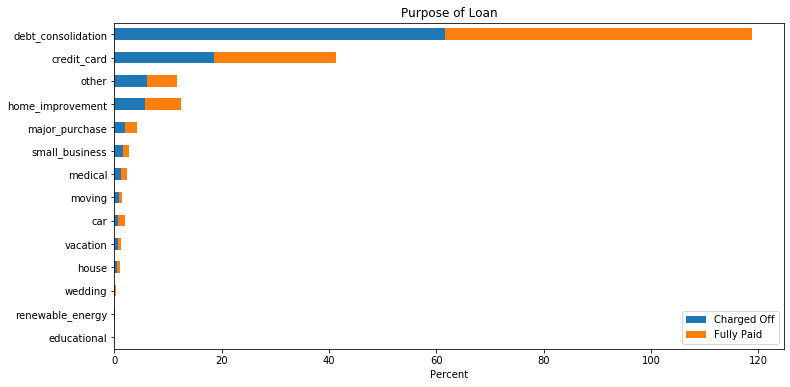

In [100]:
#'purpose' provides the same info as 'desc'
purpos_counts = (lc2.groupby(['loan_status'])['purpose'] 
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                 .reset_index()
                 .pivot(columns='loan_status', index='purpose', values='Percent')
                 .sort_values(['Charged Off'], ascending=True)
                )

purpos_counts.plot(kind='barh', stacked=True, figsize=(12,6))


plt.xlabel('Percent')

plt.ylabel('')
plt.legend(loc='lower right')
plt.title('Purpose of Loan')

plt.show()

### Application Type

In [103]:
lc2.groupby('application_type').mean()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target,grade_ord,sub_grade_ord,emp_len_ord
application_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Individual,14332.818560,13.231256,76492.974873,18.011789,0.317910,0.662324,11.599688,0.215588,16248.683759,51.962362,25.042800,0.017068,0.005099,249.649945,140349.526699,32706.019171,4.696597,13396.978080,10110.800280,60.137888,0.009138,15.218342,125.851973,181.521136,13.058393,7.837995,1.672668,23.746549,0.510322,3.652565,5.658586,4.744288,8.150617,8.570365,8.293602,14.675703,5.606958,11.649794,0.000836,0.003451,0.089332,2.182301,94.168777,45.372017,0.134207,0.052345,173390.994300,49509.879206,21573.682033,41912.931650,0.800116,2.747441,11.700369,5.987446
Joint App,19044.514137,14.687895,57756.379999,32.051693,0.301244,0.483195,11.187288,0.211860,15536.433662,49.029936,23.704136,0.012695,0.003443,238.442355,179189.588587,32819.742178,4.691914,18220.937637,10904.188373,56.494650,0.005810,6.110686,124.985374,180.351896,14.552223,8.042949,1.900159,26.120984,0.460903,3.129147,4.993459,4.119508,6.653312,8.780393,7.645307,12.854198,5.009855,11.162758,0.000301,0.002668,0.069071,2.123940,94.352885,42.447465,0.161768,0.032276,217025.461505,55130.976589,21180.988165,50095.931575,0.753454,2.974351,12.925205,4.844603


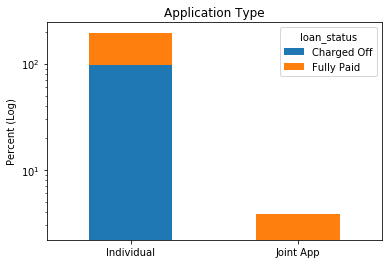

In [104]:
#application type 
apptyp_counts = (lc2.groupby(['loan_status'])['application_type'] 
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                 .reset_index()
                 .pivot(columns='loan_status', index='application_type', values='Percent')
                 .sort_values(['Charged Off'], ascending=False)
                )

apptyp_counts.plot(kind='bar', stacked=True, figsize=(6,4))

plt.xlabel('')
plt.xticks(rotation=360)
plt.ylabel('Percent (Log)')
plt.yscale('log')
plt.title('Application Type')

plt.show()

#all joint apps are paid off

In [70]:
lc2['application_type'].value_counts()

Individual    1280370
Joint App       23237
Name: application_type, dtype: int64

### Loan Title

In [115]:
lc2['title'].value_counts().head(10)

#provide similar info as loan purpose, exclude for now

Debt consolidation         638945
Credit card refinancing    240679
Home improvement           72125 
Other                      63875 
Major purchase             22974 
Debt Consolidation         15692 
Medical expenses           13060 
Business                   11359 
Car financing              10768 
Vacation                   7721  
Name: title, dtype: int64

## Numeric Variables

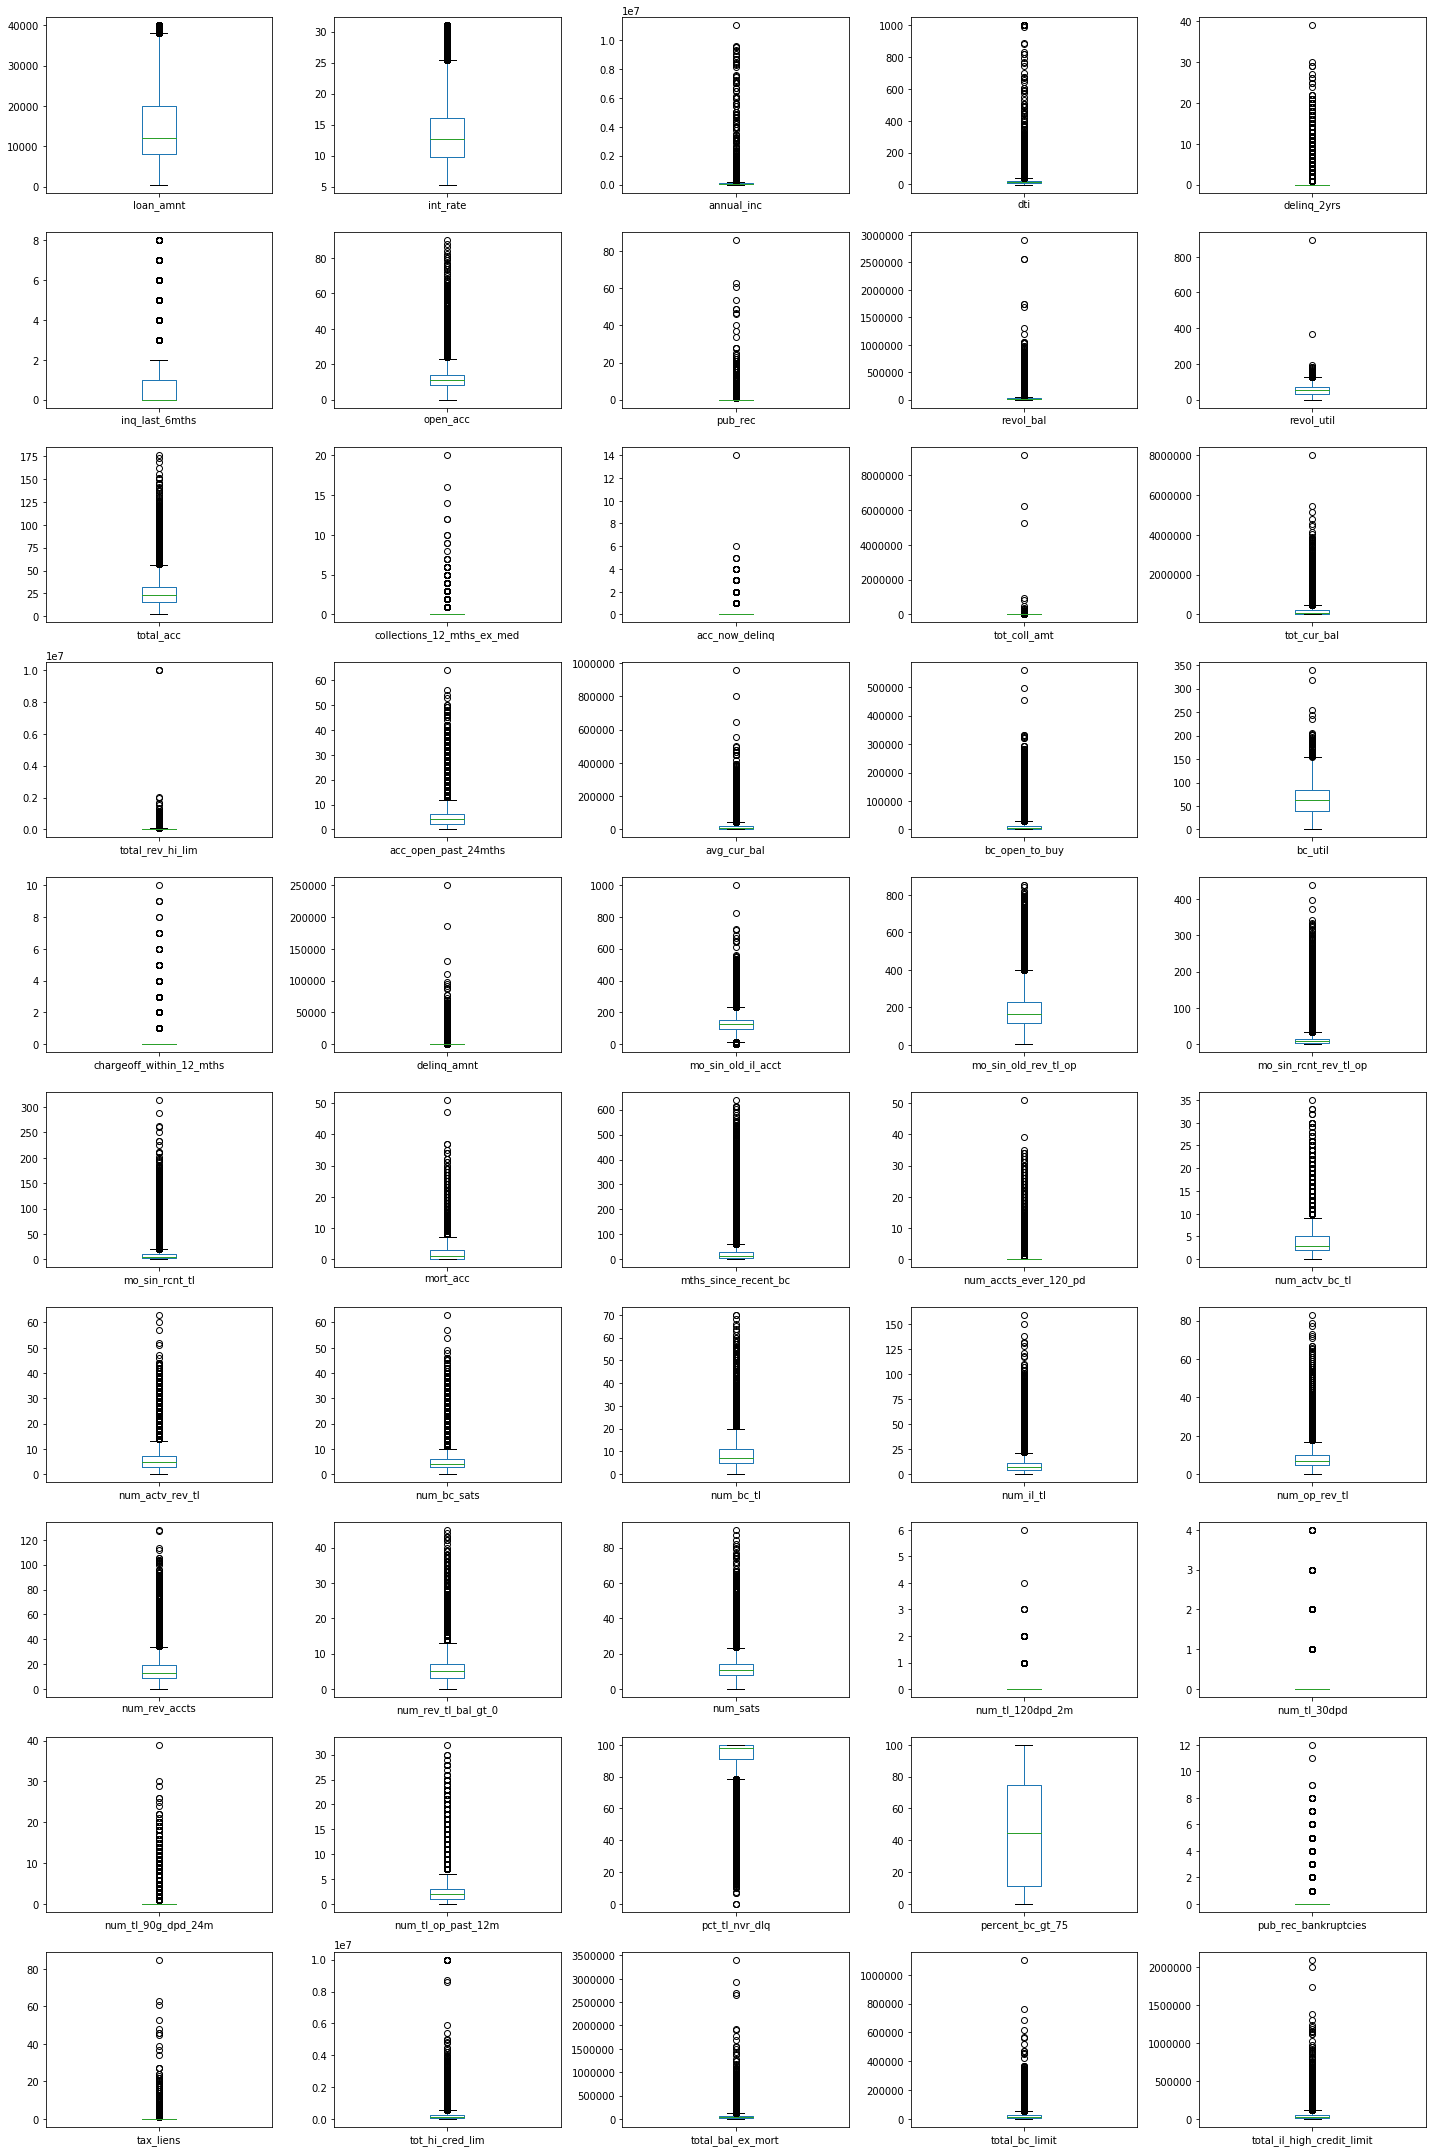

In [17]:
### boxplot: need to rerun since vars changed 

plt.figure(figsize=(20,30))

for i in range(len(num)):
    
    plt.subplot(10,5,i+1)
    
    lc2[num[i]].plot(kind='box')

plt.tight_layout()
plt.show()

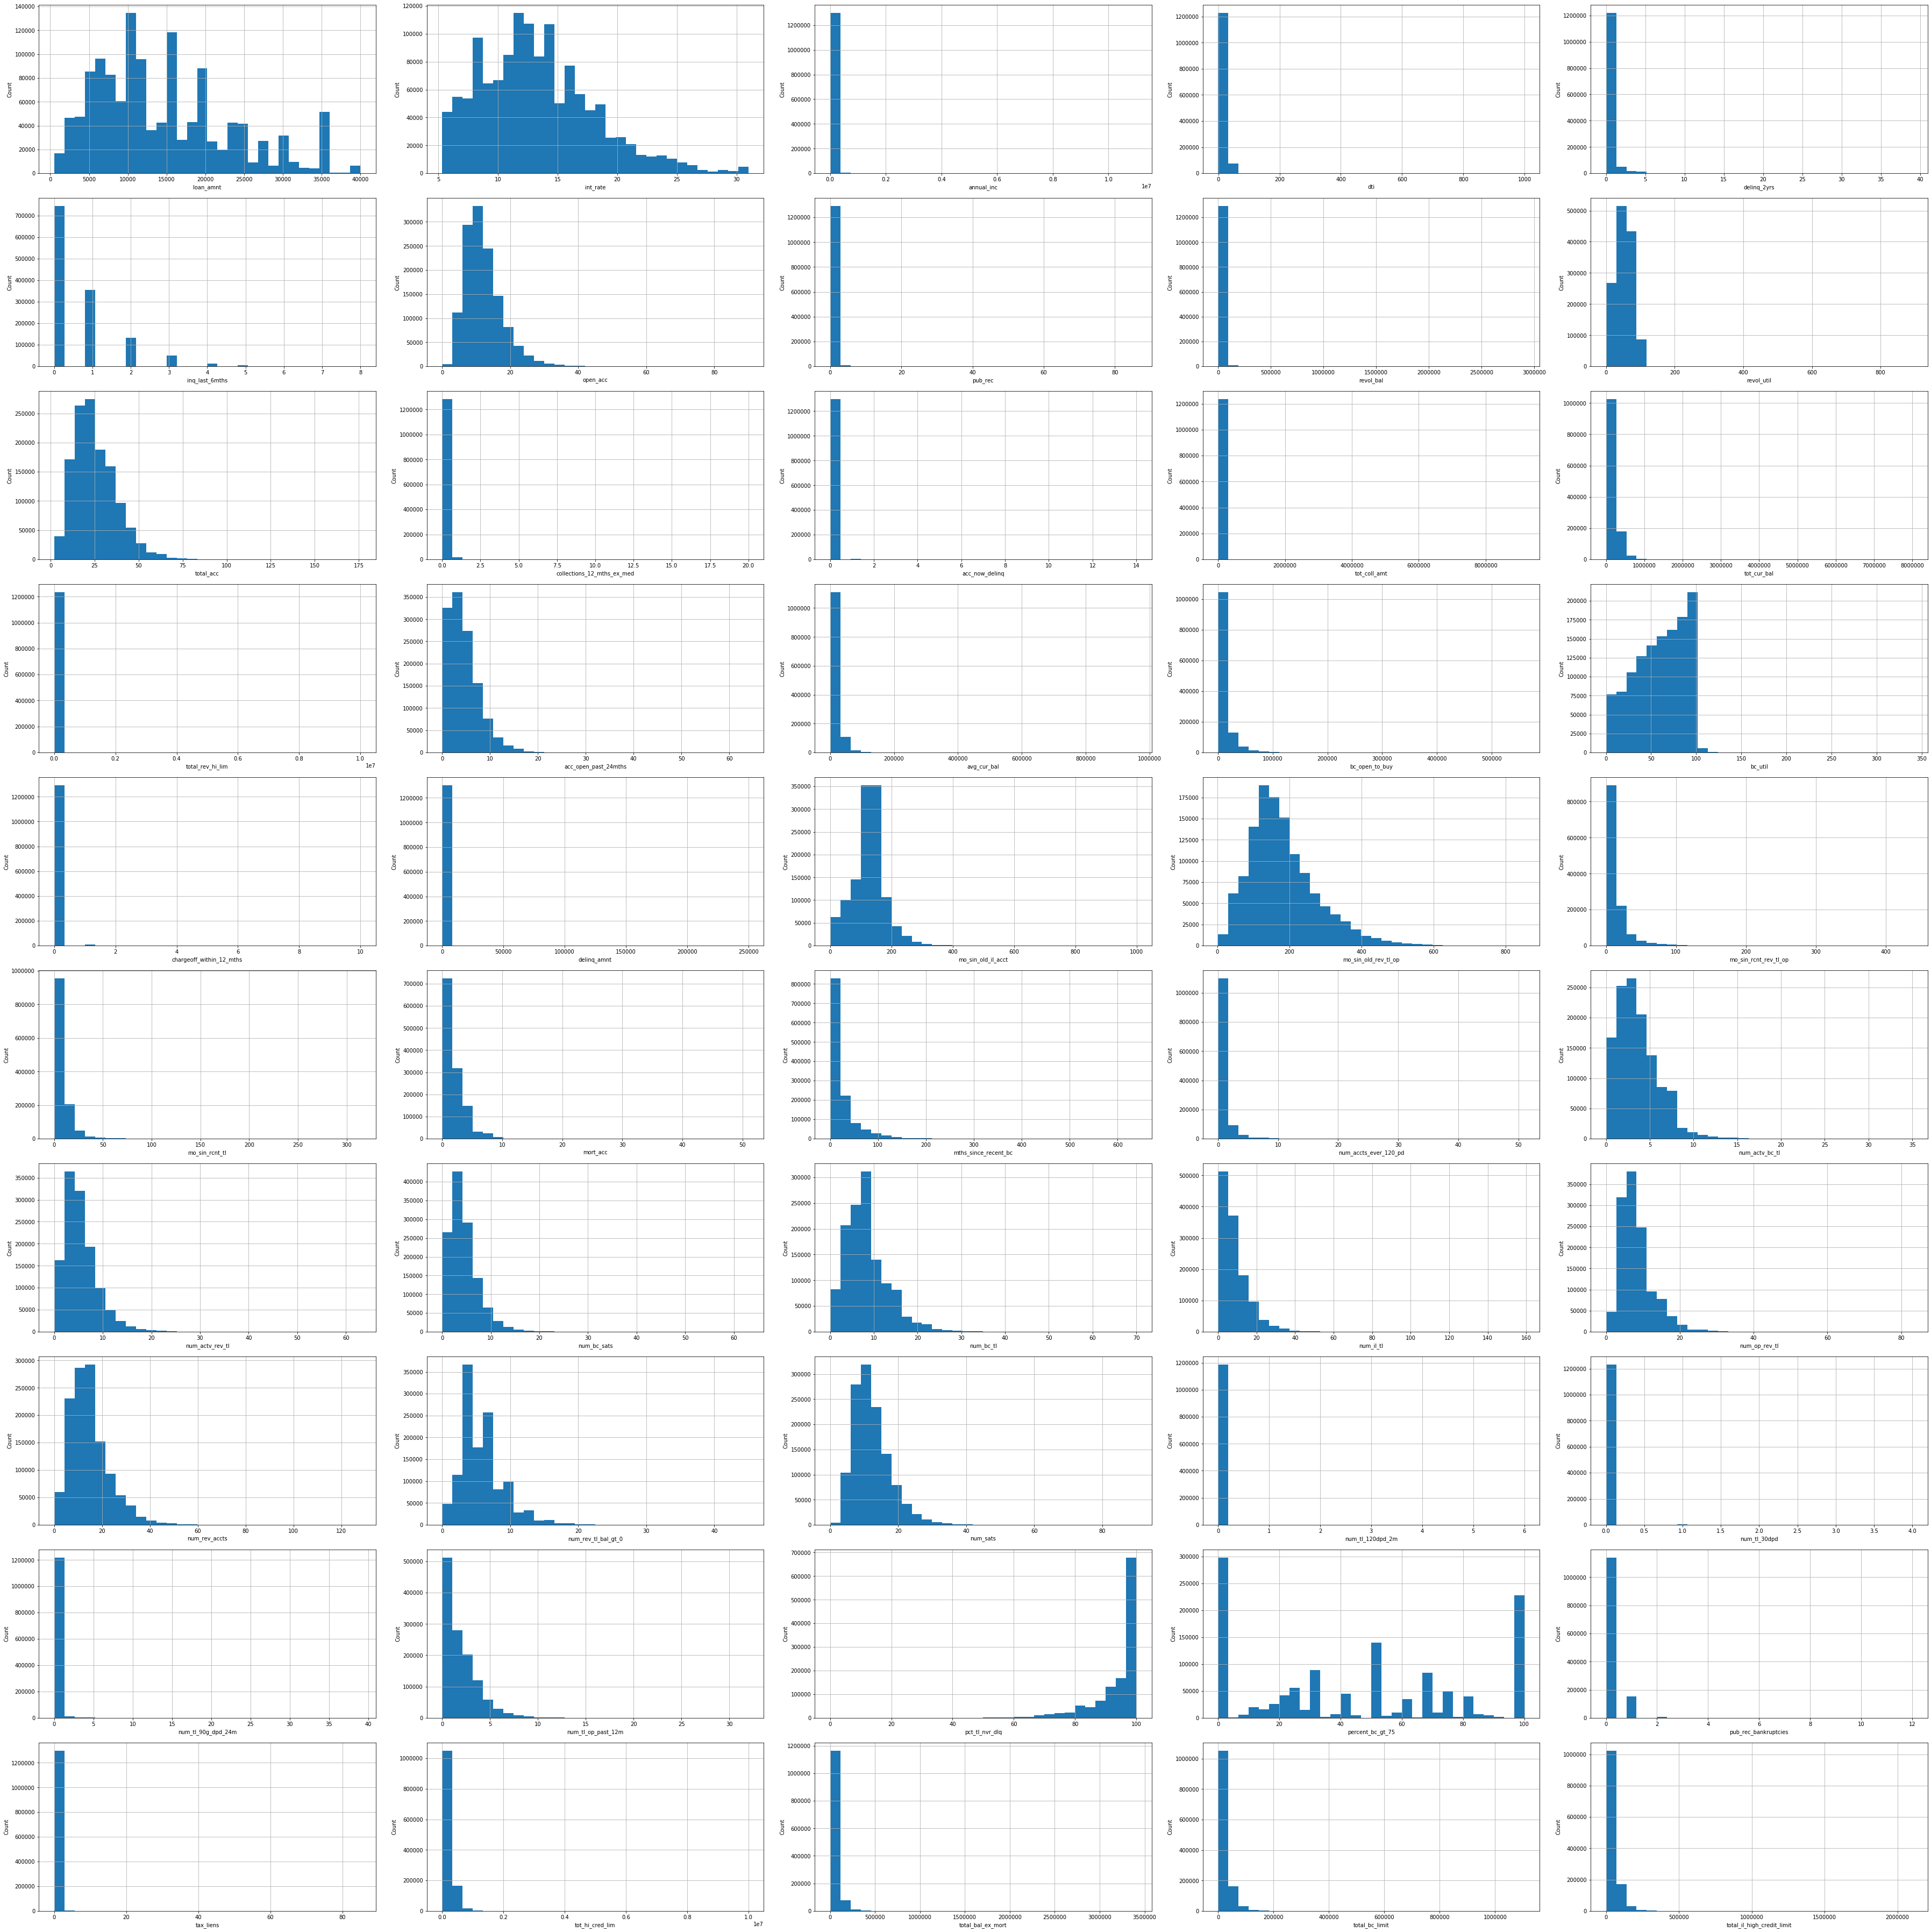

In [18]:
#histograms: need to rerun 

plt.figure(figsize=(50,50))

for i in range(len(num)):
    
    plt.subplot(10,5,i+1)
    
    lc2[num[i]].hist(bins=30)
    
    plt.xlabel(num[i])
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

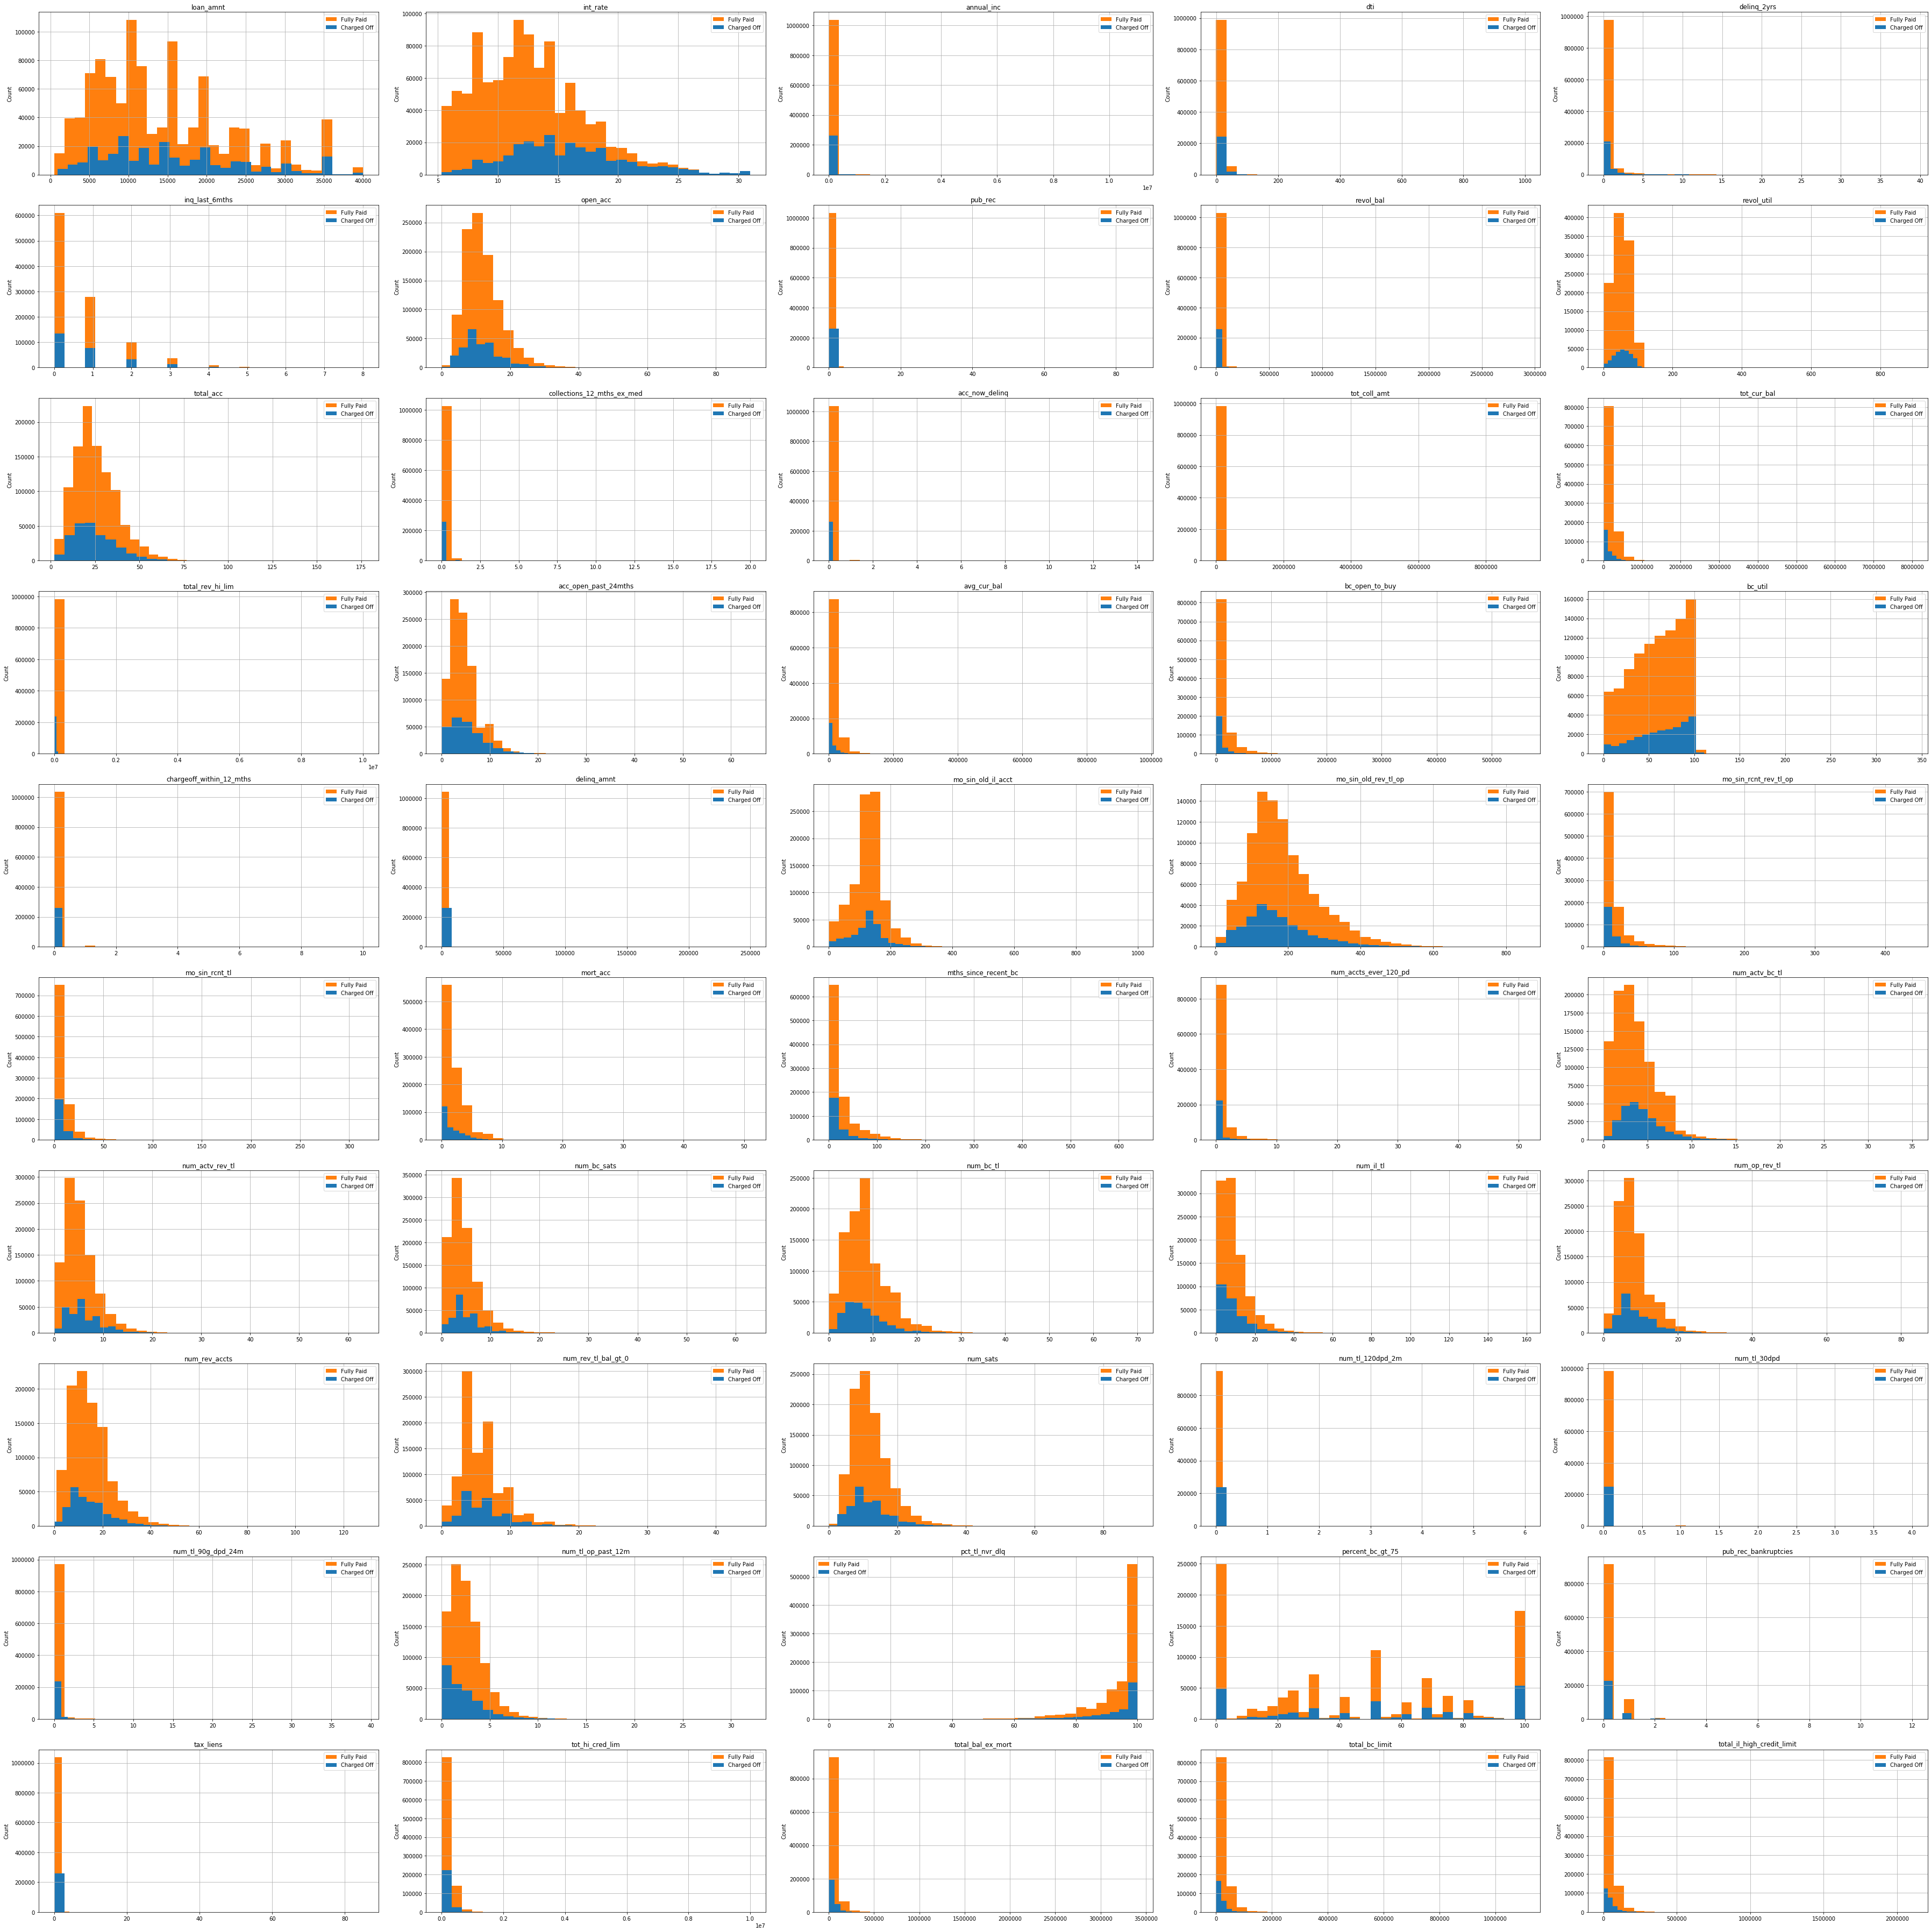

In [19]:
#histograms by loan status: need to rerun

plt.figure(figsize=(50,50))

for i in range(len(num)):
    
    plt.subplot(10,5,i+1)
    
    lc2[num[i]][lc2['loan_status']=='Fully Paid'].hist(bins=30, alpha=1.0, label='Fully Paid',
                                                       color='#ff7f0e')
    
    lc2[num[i]][lc2['loan_status']=='Charged Off'].hist(bins=30, alpha=1.0, label='Charged Off',
                                                        color='#1f77b4')

    plt.ylabel('Count')
    plt.title('{}'.format(num[i]))
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

As we can see from the histograms, most variables follow very similar even identical distribution by loan status, except that int_rate, delinq_amnt, mo_sin_rcnt_tl, num_tl_120dpd_2m, num_actv_rev_tl, total_bal_ex_mort, revol_util and open_il_24m have slightly different distributions by loan status. 

# Feature Engineering

## Change Categorical to Ordinal

### Loan Grade

In [29]:
#change grade to ordinal 

scale_mapper = {'A':1,
                'B':2,
                'C':3,
                'D':4,
                'E':5,
                'F':6,
                'G':7}

lc2['grade_ord'] = lc2['grade'].replace(scale_mapper)

### Loan Sub-Grade

In [30]:
#change sub_grade to ordinal 

scale_mapper = {'A1':1, 'A2':2, 'A3':3, 'A4':4, 'A5':5,
                'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10,
                'C1':11,'C2':12,'C3':13,'C4':14,'C5':15,
                'D1':16,'D2':17,'D3':18,'D4':19,'D5':20,
                'E1':21,'E2':22,'E3':23,'E4':24,'E5':25,
                'F1':26,'F2':27,'F3':28,'F4':29,'F5':30,
                'G1':31,'G2':32,'G3':33,'G4':34,'G5':35
               }

lc2['sub_grade_ord'] = lc2['sub_grade'].replace(scale_mapper)

### Employment Length

In [31]:
#change employment length to ordinal 

scale_mapper = {'< 1 year' :0,
                '1 year'   :1,
                '2 years'  :2,
                '3 years'  :3,
                '4 years'  :4,
                '5 years'  :5,
                '6 years'  :6,
                '7 years'  :7,
                '8 years'  :8,
                '9 years'  :9,
                '10+ years':10}

lc2['emp_len_ord'] = lc2['emp_length'].replace(scale_mapper)

## Reduce Cardinality

### Group Zip Code to Region

Based on the first digit of zip code, customers are grouped into 10 regions. 

Region1: Connecticut, Massachusetts, Maine, New Hampshire, New Jersey, Puerto Rico, Rhode Island, Vermont, Virgin Islands, Army Post Office Europe, Fleet Post Office Europe

Region2: Delaware, New York, Pennsylvania

Region3: District of Columbia, Maryland, North Carolina, South Carolina, Virginia, West Virginia

Region4: Alabama, Florida, Georgia, Mississippi, Tennessee, Army Post Office Americas, Fleet Post Office Americas

Region5: Indiana, Kentucky, Michigan, Ohio

Region6: Iowa, Minnesota, Montana, North Dakota, South Dakota, Wisconsin

Region7: Illinois, Kansas, Missouri, Nebraska

Region8: Arkansas, Louisiana, Oklahoma, Texas

Region9: Arizona, Colorado, Idaho, New Mexico, Nevada, Utah, Wyoming

Region10: Alaska, American Samoa, California, Guam, Hawaii, Marshall Islands, Federated States of Micronesia, Northern Mariana Islands, Oregon, Palau, Washington, Army Post Office Pacific, Fleet Post Office Pacific

In [32]:
#change zip_code to region and keep missing value as is

region = []

for i in lc2['zip_code']:
    if str(i).startswith('0'):
        region.append('Region1')
    elif str(i).startswith('1'):
        region.append('Region2')
    elif str(i).startswith('2'):
        region.append('Region3')
    elif str(i).startswith('3'):
        region.append('Region4')
    elif str(i).startswith('4'):
        region.append('Region5')
    elif str(i).startswith('5'):
        region.append('Region6')
    elif str(i).startswith('6'):
        region.append('Region7')
    elif str(i).startswith('7'):
        region.append('Region8')
    elif str(i).startswith('8'):
        region.append('Region9')
    elif str(i).startswith('9'):
        region.append('Region10')
    else: region.append(i)
        
lc2['region'] = region

In [18]:
lc2.groupby('region').mean()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target,grade_ord,sub_grade_ord,emp_len_ord
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Region1,14918.750611,13.027248,82599.440245,17.186861,0.376399,0.657950,11.988174,0.199141,18183.287330,51.463096,25.073802,0.014896,0.006704,171.519969,154795.722895,36499.303218,4.526848,14417.652080,11601.132031,59.114305,0.011081,26.709416,124.631182,184.800884,13.124985,8.090772,1.598719,22.687803,6.763728,0.536990,3.967581,5.912319,5.151118,9.020405,7.642345,8.712854,15.634029,5.869071,12.058100,0.001091,0.004732,0.101212,2.120129,93.573957,43.924982,0.121970,0.036345,191658.125220,49691.678392,24597.455461,40302.319575,0.807768,2.689453,11.402123,6.018520
Region10,14644.788483,13.210860,79922.886828,17.136984,0.282894,0.618412,11.049278,0.215953,16672.894494,52.738739,23.395831,0.013267,0.004224,233.593952,150107.958349,32941.730304,4.491865,14948.789131,10135.134048,60.439860,0.008725,13.772636,120.425052,182.407637,13.532481,8.261787,1.482367,24.175411,6.987356,0.523747,3.639150,5.580161,4.714780,8.038847,7.447781,8.142121,14.385012,5.535381,11.114293,0.000767,0.002631,0.082325,2.092709,94.205530,45.625390,0.150156,0.048609,182521.104676,47643.829562,21604.021498,39499.116180,0.810610,2.733806,11.633258,5.953993
Region2,14221.127103,13.382043,77078.007486,17.315737,0.349870,0.659864,11.844098,0.190373,16600.680207,51.558789,24.373698,0.017223,0.005905,157.502952,121815.587966,33627.340792,4.521387,11341.083494,10609.206617,59.481453,0.010403,20.752704,122.743438,178.068480,12.871948,8.256863,1.196934,22.673159,6.915214,0.461634,3.827128,5.869276,4.974643,8.579036,7.771894,8.647827,15.264171,5.823806,11.911237,0.000939,0.003992,0.099198,2.106450,93.993589,44.843921,0.101120,0.069027,154449.789932,48010.883542,22284.553840,39216.368540,0.782529,2.783898,11.892974,6.005054
Region3,14753.246802,13.333381,78357.867037,18.426784,0.335373,0.572350,11.596790,0.199563,17293.210142,52.786530,25.596664,0.017263,0.004853,258.772917,164418.378388,33904.603014,4.759464,15723.685588,9936.269154,60.543827,0.009456,9.256399,127.831365,183.126938,13.348018,7.690506,1.901560,25.025517,7.122675,0.531687,3.521931,5.585520,4.572608,7.985662,9.014446,8.160081,14.606044,5.543069,11.659271,0.000749,0.003487,0.092798,2.232023,93.948454,46.092406,0.107370,0.053530,198841.225389,53572.707472,21434.069606,45028.124912,0.801717,2.774929,11.830515,5.999883
Region4,14002.563798,13.396615,71800.893417,18.911677,0.315023,0.626430,11.600521,0.231568,15308.972642,50.818045,25.043066,0.019817,0.004651,268.857822,133067.526433,31478.642495,4.907886,12705.599622,9731.046681,59.109884,0.009291,16.737192,124.937050,179.205387,12.393229,7.423905,1.726860,22.980477,6.768849,0.554214,3.620668,5.651504,4.710398,7.984591,8.743480,8.260375,14.455614,5.603402,11.635862,0.000845,0.003066,0.094674,2.288003,94.136337,43.961542,0.143746,0.063371,165318.334949,49361.080662,20365.388388,42187.410358,0.788157,2.793793,11.938477,5.943431
Region5,13789.713286,13.342297,68594.211078,19.353323,0.313986,0.779989,11.899755,0.336169,15003.576054,51.532882,25.834515,0.017194,0.005062,222.457968,124661.857308,30549.990161,4.771420,11595.304036,9166.228065,60.736433,0.008188,6.771365,131.063401,184.363123,12.714155,7.570653,1.84

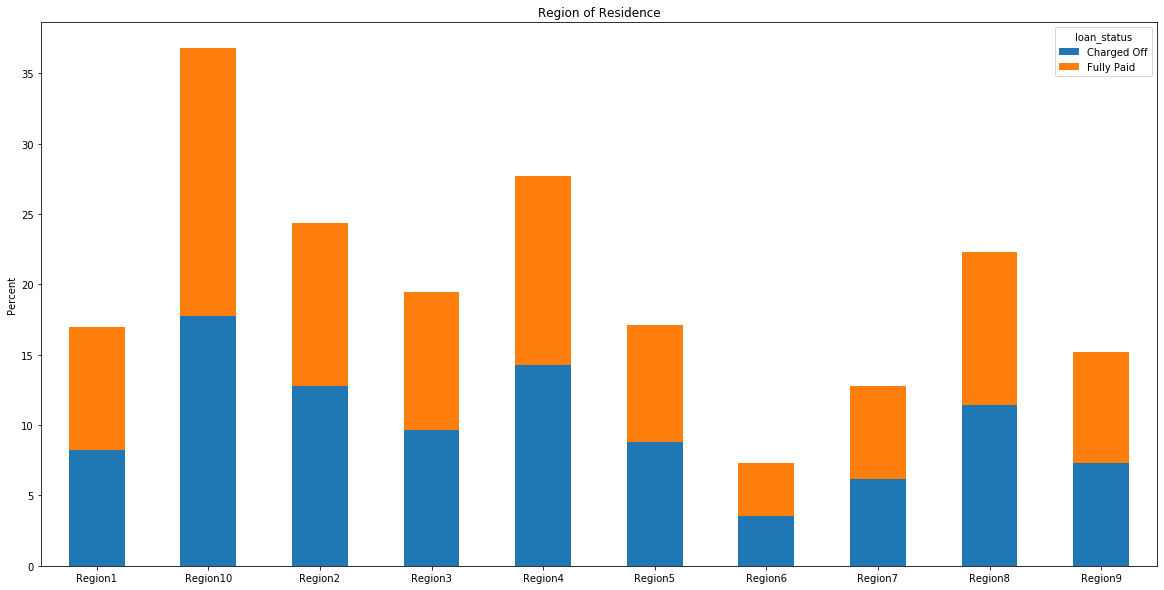

In [99]:
region_counts = (lc2.groupby(['loan_status'])['region'] 
                 .value_counts(normalize=True)
                 .rename('Percent')
                 .mul(100)
                 .reset_index()
                 .pivot(columns='loan_status', index='region', values='Percent')
                 .sort_values(['region'], ascending=True)
                )

region_counts.plot(kind='bar', stacked=True, figsize=(20,10))

plt.xlabel('')
plt.xticks(rotation=360)
plt.ylabel('Percent')
plt.title("Region of Residence")

plt.show()

### NLP: Job Title

In [314]:
emp=pd.DataFrame(lc2['emp_title'].dropna())

emp.head()

,emp_title
100,Supervisor
152,Assistant to the Treasurer (Payroll)
170,Teacher
186,Accounts Examiner III
215,Senior Director Risk Management


Since this step is time consuming, it is presented below after the final dataset is determined. 

## Summarize Varaibles

In [10]:
#finalize data for feature selection
lc2 = lc2.drop(['grade', 'sub_grade', 'zip_code', 'emp_length', 'title', 'loan_status'], axis=1)

In [187]:
#categorical variables

cat = lc2.select_dtypes(['object']).columns

print('There are {} categorical variables.'.format(len(cat)))
print('')
print(cat.values)

There are 8 categorical variables.

['term' 'emp_title' 'home_ownership' 'verification_status' 'purpose'
 'addr_state' 'application_type' 'region']


In [199]:
#numeric variables 

num = lc2.select_dtypes(['int64', 'float64']).columns

print('There are {} numeric variables including target.'.format(len(num)))
print('')
print(num.values)

There are 54 numeric variables including target.

['loan_amnt' 'int_rate' 'annual_inc' 'dti' 'delinq_2yrs' 'inq_last_6mths'
 'open_acc' 'pub_rec' 'revol_bal' 'revol_util' 'total_acc'
 'collections_12_mths_ex_med' 'acc_now_delinq' 'tot_coll_amt'
 'tot_cur_bal' 'total_rev_hi_lim' 'acc_open_past_24mths' 'avg_cur_bal'
 'bc_open_to_buy' 'bc_util' 'chargeoff_within_12_mths' 'delinq_amnt'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'num_accts_ever_120_pd' 'num_actv_bc_tl' 'num_actv_rev_tl' 'num_bc_sats'
 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl' 'num_rev_accts'
 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m' 'num_tl_30dpd'
 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'pub_rec_bankruptcies' 'tax_liens' 'tot_hi_cred_lim'
 'total_bal_ex_mort' 'total_bc_limit' 'total_il_high_credit_limit'
 'target' 'grade_ord' 'sub_grade_ord' 'emp_len_ord']


In [182]:
#recheck missing for lc2

total_missing = lc2.isnull().sum().sort_values(ascending=False)
percent_missing = (lc2.isnull().sum() / lc2.isnull().count() * 100).sort_values(ascending=False)

missing2 = pd.concat([total_missing, percent_missing], axis=1, keys=['Total_missing', 'Percent_missing'])
miss2 = missing2[missing2['Percent_missing'] > 0]

In [183]:
clean = missing2[missing2['Percent_missing']==0]

print('{} variables have no missing values.'.format(len(clean)))

names_nomiss = clean.index.values
names_nomiss

19 variables have no missing values.


array(['application_type', 'addr_state', 'term', 'int_rate',
       'sub_grade_ord', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'grade_ord', 'acc_now_delinq',
       'delinq_2yrs', 'target', 'open_acc', 'pub_rec', 'revol_bal',
       'delinq_amnt', 'total_acc', 'loan_amnt'], dtype=object)

In [184]:
tab1 = pd.DataFrame(cat, columns=['var'], index=range(1,9))
tab1['Type']='categorical'

tab2 = pd.DataFrame(num, columns=['var'], index=range(9,63))
tab2['Type']='numeric'

tab = pd.concat([tab1, tab2])

#variable type and cardinality 
card = []

for i in tab['var']:
    card.append(len(lc2[i].unique()))
    
tab['Cardinality']=card

tab = tab.set_index('var')
varsum = pd.concat([tab, missing2], axis=1)

In [185]:
varsum = varsum.sort_values(['Percent_missing'], ascending=True)
varsum

,Type,Cardinality,Total_missing,Percent_missing
acc_now_delinq,numeric,8,0,0.000000
total_acc,numeric,142,0,0.000000
term,categorical,2,0,0.000000
target,numeric,2,0,0.000000
sub_grade_ord,numeric,35,0,0.000000
revol_bal,numeric,82819,0,0.000000
purpose,categorical,14,0,0.000000
pub_rec,numeric,37,0,0.000000
open_acc,numeric,84,0,0.000000
loan_amnt,numeric,1553,0,0.000000


In [147]:
len(varsum)

62

In [148]:
#first check those variables that don't have missing data
print(names_nomiss)

['application_type' 'addr_state' 'term' 'int_rate' 'sub_grade_ord'
 'home_ownership' 'annual_inc' 'verification_status' 'purpose' 'grade_ord'
 'acc_now_delinq' 'delinq_2yrs' 'target' 'open_acc' 'pub_rec' 'revol_bal'
 'delinq_amnt' 'total_acc' 'loan_amnt']


## Correlation Matrix

Examining correlation matrix, high correlations are observed between/among the following numeric variables:

+ open_il_12m and open_il_24m (r=0.75)

+ acc_open_past_24mths with open_rv_24m (r=0.84) and num_tl_op_past_12m (r=0.76)
 
+ num_actv_bc_tl with num_bc_sats (r=0.83) and num_actv_rev_tl (r=0.81)

+ num_bc_tl and num_rev_accts (r=0.84)

+ num_op_rev_tl with num_rev_accts (r=0.77), num_rev_tl_bal_gt_0 (r=0.8) and num_sats (r=0.83)

+ total_bal_ex_mort with total_il_high_credit_limit and total_bal_il (r=0.9)

+ revol_bal and total_rev_hi_lim (r=0.81)

+ total_acc with open_acc (r=0.7) and num_sats (r=0.7)

+ num_sats and open_acc are perfectly correlated

+ bc_util and revol_util (r=0.85)

+ num_rev_accts and total_acc (r=0.76)

+ acc_now_delinq and num_tl_30dpd (r=0.79) 

+ tot_cur_bal with avg_cur_bal (r=0.84) and tot_hi_cred_lim (r=0.97) 

+ avg_cur_bal and tot_hi_cred_lim (r=0.8)

+ num_tl_op_past_12m with open_acc_6m (r=0.72) and open_rv_12m (r=0.84)

+ open_rv_24m with acc_open_past_24mths (r=0.84) and open_rv_12m (r=0.77)

+ total_bc_limit and total_rev_hi_lim (r=0.71)

+ bc_open_to_buy and total_bc_limit (r=0.84) 

+ percent_bc_gt_75 and bc_util (r=0.84)

+ num_actv_rev_tl and num_rev_tl_bal_gt_0 (r=0.98) 

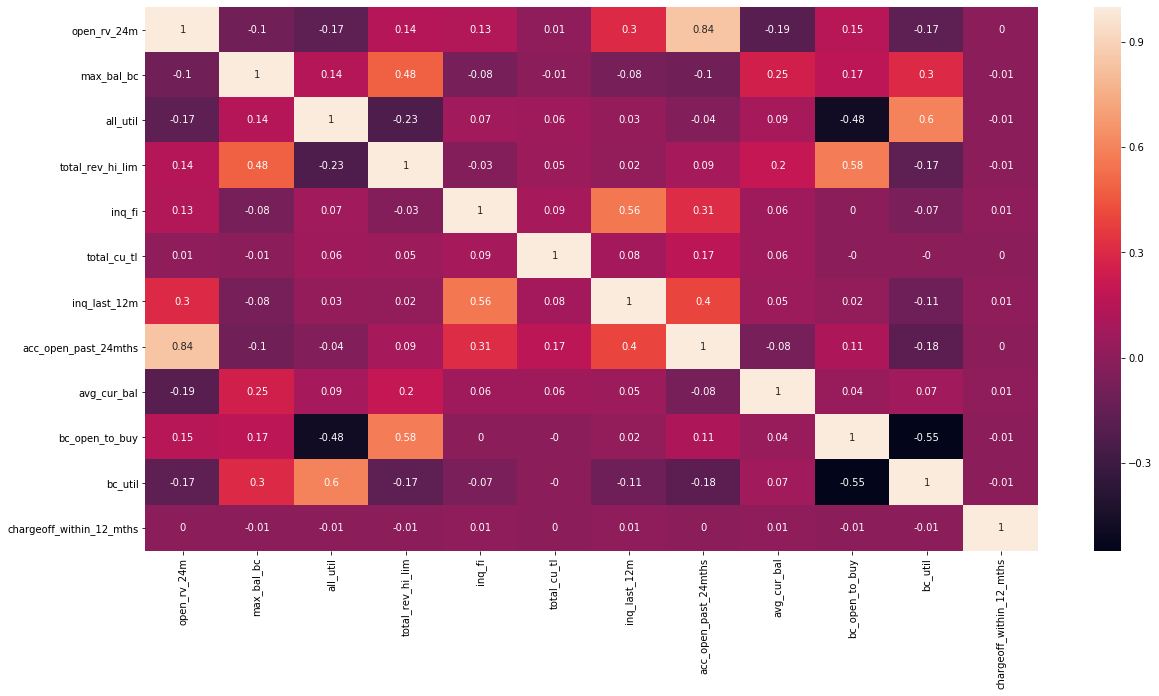

In [171]:
#check correlation between features 
#check first 11 numeric variables 
num1 = lc2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
            'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
            'open_acc', 'pub_rec', 'revol_bal']]

num2 = lc2[['revol_util', 'total_acc', 'collections_12_mths_ex_med',
            'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
            'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
            'open_rv_12m']]

num3 = lc2[['open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
            'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
            'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths']]

num4 = lc2[['delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
            'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
            'mths_since_recent_bc', 'mths_since_recent_inq',
            'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
            'num_bc_sats']]

num5 = lc2[['num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
            'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
            'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
            'percent_bc_gt_75']]

num6 = lc2[['pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
            'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']]


plt.figure(figsize=(20,10))
sns.heatmap(num3.corr().round(2), annot=True)

plt.show()

## Use Simple Logistic Regression Model to Determine Features

### LC1: Baseline

First, fit logistic regression model with variables that don't have missing values. 

In [33]:
#feat1 is the baseline including all non-missing vars 
#all changes made to features are based on the baseline 

feat1 = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
         'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
         'grade_ord', 'verification_status', 'application_type', 'addr_state', 
         'delinq_amnt', 'delinq_2yrs', 'annual_inc']

In [34]:
#lc2 for non-missing vars 

X = pd.DataFrame(pd.get_dummies(lc2[feat1], drop_first=True))

y = pd.DataFrame(lc2['target'], columns=['target'])

In [160]:
#split into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train Set Size is 912524.
Test Set Size is 391083.


In [161]:
#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_test, spe_test, f1_test, model, feature, \
N, pctmiss, atm, addfeat = [], [], [], [], [], [], [], [], [], [], []

#model 1: logistic regression

lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

accu_train = lr.score(X_train, y_train)
accu_test = lr.score(X_test, y_test)

conf_matrix = confusion_matrix(y_test, pred_test)

TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

#calculate mis-classification
conf_misclassification = 1 - conf_accuracy

#calculate sensitivity, recall, hit rate, or true positive rate
conf_sensitivity = (TP / float(TP + FN))

#calculate specificity or true negative rate
conf_specificity = (TN / float(TN + FP))

#calculate precision
conf_precision = (TP / float(TP + FP))

#calculate f1-score
conf_f1 = (2 * conf_sensitivity * conf_precision) / (conf_sensitivity + conf_precision)
    
#calculate typeI error
conf_type1 = (float(FP))

#get results 
Accu_train.append(accu_train)
Accu_test.append(accu_test)
sen_test.append(conf_sensitivity)
spe_test.append(conf_specificity)
f1_test.append(conf_f1)

In [162]:
#LR1:baseline 

model.append('LR1')
feature.append(len(feat1))
N.append(len(y))
pctmiss.append(0)
atm.append('NA')
addfeat.append('Baseline')


data={'Accu_Train':Accu_train,
      'Accu_Test':Accu_test,
      'Sensitivity':sen_test,
      'Specificity':spe_test,
      'F1-Score':f1_test,
      'Total Sample Size':N,
      '%Missing':pctmiss,
      'Handle Missing':atm,
      'N_Feats':feature,
      'Feats Added to Baseline':addfeat}

t1 = pd.DataFrame(data=data, index=model)

t1

,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR1,0.799952,0.800244,0.981379,0.078817,0.887055,1303607,0,NA,18,Baseline


### LR2: Add Two Vars to Baseline

In [163]:
#add region and inq_last_6mths to baseline

feat2 = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
         'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
         'grade_ord', 'verification_status', 'application_type', 'addr_state', 
         'delinq_amnt', 'delinq_2yrs', 'annual_inc',
       
         'region', 'inq_last_6mths']

var2 =  ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
         'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
         'grade_ord', 'verification_status', 'application_type', 'addr_state', 
         'delinq_amnt', 'delinq_2yrs', 'annual_inc',
       
         'region', 'inq_last_6mths',
         'target']

add2 =  ['region', 'inq_last_6mths']

In [164]:
### use lc3 for vars with missing

lc3 = pd.DataFrame(lc2[var2])

lc3 = lc3.dropna()


X = pd.get_dummies(lc3[feat2], drop_first=True)

y = pd.DataFrame(lc3['target'], columns=['target'])

In [165]:
#split into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train Set Size is 912523.
Test Set Size is 391082.


In [166]:
#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_test, spe_test, f1_test, model, feature, \
N, pctmiss, atm, addfeat = [], [], [], [], [], [], [], [], [], [], []

#model 1: logistic regression

lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

accu_train = lr.score(X_train, y_train)
accu_test = lr.score(X_test, y_test)

conf_matrix = confusion_matrix(y_test, pred_test)

TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

#calculate mis-classification
conf_misclassification = 1 - conf_accuracy

#calculate sensitivity, recall, hit rate, or true positive rate
conf_sensitivity = (TP / float(TP + FN))

#calculate specificity or true negative rate
conf_specificity = (TN / float(TN + FP))

#calculate precision
conf_precision = (TP / float(TP + FP))

#calculate f1-score
conf_f1 = (2 * conf_sensitivity * conf_precision) / (conf_sensitivity + conf_precision)
    
#calculate typeI error
conf_type1 = (float(FP))

#get results 
Accu_train.append(accu_train)
Accu_test.append(accu_test)
sen_test.append(conf_sensitivity)
spe_test.append(conf_specificity)
f1_test.append(conf_f1)

In [167]:
model.append('LR2')
feature.append(len(feat2))
N.append(len(y))
pctmiss.append(0.00001)
atm.append('Drop')
addfeat.append(add2)


data = {'Accu_Train':Accu_train,
        'Accu_Test':Accu_test,
        'Sensitivity':sen_test,
        'Specificity':spe_test,
        'F1-Score':f1_test,
        'Total Sample Size':N,
        '%Missing':pctmiss,
        'Handle Missing':atm,
        'N_Feats':feature,
        'Feats Added to Baseline':addfeat}

t2 = pd.DataFrame(data=data, index=model)

t2

,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR2,0.799943,0.800165,0.980617,0.080916,0.886952,1303605,0.00001,Drop,20,"[region, inq_last_6mths]"


In [168]:
table = pd.concat([t1, t2])


print('Summary Statistics')

table.sort_values(['Specificity'], ascending=False)

Summary Statistics


,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR2,0.799943,0.800165,0.980617,0.080916,0.886952,1303605,0.00001,Drop,20,"[region, inq_last_6mths]"
LR1,0.799952,0.800244,0.981379,0.078817,0.887055,1303607,0.00000,NA,18,Baseline


### LR3: Add Remaining Vars but Job Title

In [186]:
varsum.index

Index(['acc_now_delinq', 'total_acc', 'term', 'target', 'sub_grade_ord',
       'revol_bal', 'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate',
       'home_ownership', 'grade_ord', 'verification_status', 'annual_inc',
       'addr_state', 'delinq_amnt', 'application_type', 'delinq_2yrs',
       'region', 'inq_last_6mths', 'tax_liens', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'dti', 'pub_rec_bankruptcies',
       'revol_util', 'total_bc_limit', 'total_bal_ex_mort', 'mort_acc',
       'acc_open_past_24mths', 'num_sats', 'num_bc_sats',
       'mths_since_recent_bc', 'bc_open_to_buy', 'percent_bc_gt_75', 'bc_util',
       'num_tl_30dpd', 'tot_hi_cred_lim', 'total_il_high_credit_limit',
       'tot_coll_amt', 'tot_cur_bal', 'num_bc_tl', 'num_tl_op_past_12m',
       'mo_sin_rcnt_tl', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_il_tl', 'num_op_rev_tl', 'total_rev_hi_lim',
       'num_rev_tl_bal_gt_0', 'num_tl_90g_dpd_24m', 'mo_sin

In [201]:
feat3 = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
         'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
         'grade_ord', 'verification_status', 'application_type', 'addr_state', 
         'delinq_amnt', 'delinq_2yrs', 'annual_inc',
     
         'region', 'inq_last_6mths',
      
         'tax_liens', 'chargeoff_within_12_mths',
         'collections_12_mths_ex_med', 'dti', 'pub_rec_bankruptcies',
         'revol_util', 'total_bc_limit', 'total_bal_ex_mort', 'mort_acc',
         'acc_open_past_24mths', 'num_sats', 'num_bc_sats',
         'mths_since_recent_bc', 'bc_open_to_buy', 'percent_bc_gt_75', 'bc_util',
         'num_tl_30dpd', 'tot_hi_cred_lim', 'total_il_high_credit_limit',
         'tot_coll_amt', 'tot_cur_bal', 'num_bc_tl', 'num_tl_op_past_12m',
         'mo_sin_rcnt_tl', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
         'num_actv_rev_tl', 'num_il_tl', 'num_op_rev_tl', 'total_rev_hi_lim',
         'num_rev_tl_bal_gt_0', 'num_tl_90g_dpd_24m', 'mo_sin_rcnt_rev_tl_op',
         'mo_sin_old_rev_tl_op', 'num_rev_accts', 'avg_cur_bal',
         'pct_tl_nvr_dlq', 'emp_len_ord', 'mo_sin_old_il_acct',
         'num_tl_120dpd_2m'
        ]

var3 = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
        'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
        'grade_ord', 'verification_status', 'application_type', 'addr_state', 
        'delinq_amnt', 'delinq_2yrs', 'annual_inc',
     
        'region', 'inq_last_6mths',
      
        'tax_liens', 'chargeoff_within_12_mths',
        'collections_12_mths_ex_med', 'dti', 'pub_rec_bankruptcies',
        'revol_util', 'total_bc_limit', 'total_bal_ex_mort', 'mort_acc',
        'acc_open_past_24mths', 'num_sats', 'num_bc_sats',
        'mths_since_recent_bc', 'bc_open_to_buy', 'percent_bc_gt_75', 'bc_util',
        'num_tl_30dpd', 'tot_hi_cred_lim', 'total_il_high_credit_limit',
        'tot_coll_amt', 'tot_cur_bal', 'num_bc_tl', 'num_tl_op_past_12m',
        'mo_sin_rcnt_tl', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
        'num_actv_rev_tl', 'num_il_tl', 'num_op_rev_tl', 'total_rev_hi_lim',
        'num_rev_tl_bal_gt_0', 'num_tl_90g_dpd_24m', 'mo_sin_rcnt_rev_tl_op',
        'mo_sin_old_rev_tl_op', 'num_rev_accts', 'avg_cur_bal',
        'pct_tl_nvr_dlq', 'emp_len_ord', 'mo_sin_old_il_acct',
        'num_tl_120dpd_2m', 
        
        'target']

add3 = [ 'region', 'inq_last_6mths',
      
         'tax_liens', 'chargeoff_within_12_mths',
         'collections_12_mths_ex_med', 'dti', 'pub_rec_bankruptcies',
         'revol_util', 'total_bc_limit', 'total_bal_ex_mort', 'mort_acc',
         'acc_open_past_24mths', 'num_sats', 'num_bc_sats',
         'mths_since_recent_bc', 'bc_open_to_buy', 'percent_bc_gt_75', 'bc_util',
         'num_tl_30dpd', 'tot_hi_cred_lim', 'total_il_high_credit_limit',
         'tot_coll_amt', 'tot_cur_bal', 'num_bc_tl', 'num_tl_op_past_12m',
         'mo_sin_rcnt_tl', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
         'num_actv_rev_tl', 'num_il_tl', 'num_op_rev_tl', 'total_rev_hi_lim',
         'num_rev_tl_bal_gt_0', 'num_tl_90g_dpd_24m', 'mo_sin_rcnt_rev_tl_op',
         'mo_sin_old_rev_tl_op', 'num_rev_accts', 'avg_cur_bal',
         'pct_tl_nvr_dlq', 'emp_len_ord', 'mo_sin_old_il_acct',
         'num_tl_120dpd_2m'
       ]

In [202]:
### use lc3 for vars with missing

lc3 = pd.DataFrame(lc2[var3])

lc3 = lc3.dropna()

X = pd.get_dummies(lc3[feat3], drop_first=True)

y = pd.DataFrame(lc3['target'], columns=['target'])

In [203]:
#split into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train Set Size is 752406.
Test Set Size is 322460.


In [204]:
#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_test, spe_test, f1_test, model, feature, \
N, pctmiss, atm, addfeat = [], [], [], [], [], [], [], [], [], [], []

#model 1: logistic regression

lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

accu_train = lr.score(X_train, y_train)
accu_test = lr.score(X_test, y_test)

conf_matrix = confusion_matrix(y_test, pred_test)

TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

#calculate mis-classification
conf_misclassification = 1 - conf_accuracy

#calculate sensitivity, recall, hit rate, or true positive rate
conf_sensitivity = (TP / float(TP + FN))

#calculate specificity or true negative rate
conf_specificity = (TN / float(TN + FP))

#calculate precision
conf_precision = (TP / float(TP + FP))

#calculate f1-score
conf_f1 = (2 * conf_sensitivity * conf_precision) / (conf_sensitivity + conf_precision)
    
#calculate typeI error
conf_type1 = (float(FP))

#get results 
Accu_train.append(accu_train)
Accu_test.append(accu_test)
sen_test.append(conf_sensitivity)
spe_test.append(conf_specificity)
f1_test.append(conf_f1)

In [205]:
model.append('LR3')
feature.append(len(feat3))
N.append(len(y))
pctmiss.append(8.87)
atm.append('Drop')
addfeat.append(add3)


data = {'Accu_Train':Accu_train,
        'Accu_Test':Accu_test,
        'Sensitivity':sen_test,
        'Specificity':spe_test,
        'F1-Score':f1_test,
        'Total Sample Size':N,
        '%Missing':pctmiss,
        'Handle Missing':atm,
        'N_Feats':feature,
        'Feats Added to Baseline':addfeat}

t3 = pd.DataFrame(data=data, index=model)

t3

,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR3,0.807052,0.804816,0.967116,0.139629,0.888469,1074866,8.87,Drop,60,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, total_bc_limit, total_bal_ex_mort, mort_acc, acc_open_past_24mths, num_sats, num_bc_sats, mths_since_recent_bc, bc_open_to_buy, percent_bc_gt_75, bc_util, num_tl_30dpd, tot_hi_cred_lim, total_il_high_credit_limit, tot_coll_amt, tot_cur_bal, num_bc_tl, num_tl_op_past_12m, mo_sin_rcnt_tl, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_il_tl, num_op_rev_tl, total_rev_hi_lim, num_rev_tl_bal_gt_0, num_tl_90g_dpd_24m, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, num_rev_accts, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, mo_sin_old_il_acct, num_tl_120dpd_2m]"


In [206]:
table = pd.concat([t1, t2, t3])


print('Summary Statistics')

table.sort_values(['Specificity'], ascending=False)

Summary Statistics


,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR3,0.807052,0.804816,0.967116,0.139629,0.888469,1074866,8.87000,Drop,60,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, total_bc_limit, total_bal_ex_mort, mort_acc, acc_open_past_24mths, num_sats, num_bc_sats, mths_since_recent_bc, bc_open_to_buy, percent_bc_gt_75, bc_util, num_tl_30dpd, tot_hi_cred_lim, total_il_high_credit_limit, tot_coll_amt, tot_cur_bal, num_bc_tl, num_tl_op_past_12m, mo_sin_rcnt_tl, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_il_tl, num_op_rev_tl, total_rev_hi_lim, num_rev_tl_bal_gt_0, num_tl_90g_dpd_24m, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, num_rev_accts, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, mo_sin_old_il_acct, num_tl_120dpd_2m]"
LR2,0.799943,0.800165,0.980617,0.080916,0.886952,1303605,0.00001,Drop,20,"[region, inq_last_6mths]"
LR1,0.799952,0.800244,0.981379,0.078817,0.887055,1303607,0.00000,NA,18,Baseline


### LR4: Exclude Vars from LR3 to Aviod Multicollinearity

In [35]:
#excluding those vars could cause multicollinearity 

feat4 = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
         'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
         'grade_ord', 'verification_status', 'application_type', 'addr_state', 
         'delinq_amnt', 'delinq_2yrs', 'annual_inc',
       
         'region', 'inq_last_6mths',
      
         'tax_liens', 
         'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
        
         'dti', 'pub_rec_bankruptcies', 'revol_util', 
      
         #'total_bc_limit',
       
         #'num_tl_op_past_12m',
         #'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_op_rev_tl', 'num_il_tl',
         #'total_rev_hi_lim', 
         'num_bc_tl', 'num_actv_bc_tl', 'mo_sin_rcnt_tl',
         #'total_il_high_credit_limit', 
         'num_tl_90g_dpd_24m', 'num_actv_rev_tl',
         #'tot_hi_cred_lim', 
         'tot_cur_bal', 'tot_coll_amt',
         'num_accts_ever_120_pd', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op',
         'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
         'emp_len_ord'
        
         #'mo_sin_old_il_acct', 'num_tl_120dpd_2m'
        ]

var4 = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
         'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
         'grade_ord', 'verification_status', 'application_type', 'addr_state', 
         'delinq_amnt', 'delinq_2yrs', 'annual_inc',
       
         'region', 'inq_last_6mths',
      
         'tax_liens', 
         'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
        
         'dti', 'pub_rec_bankruptcies', 'revol_util', 
      
         #'total_bc_limit',
       
         #'num_tl_op_past_12m',
         #'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_op_rev_tl', 'num_il_tl',
         #'total_rev_hi_lim', 
         'num_bc_tl', 'num_actv_bc_tl', 'mo_sin_rcnt_tl',
         #'total_il_high_credit_limit', 
         'num_tl_90g_dpd_24m', 'num_actv_rev_tl',
         #'tot_hi_cred_lim', 
         'tot_cur_bal', 'tot_coll_amt',
         'num_accts_ever_120_pd', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op',
         'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
         'emp_len_ord',
        
         #'mo_sin_old_il_acct', 'num_tl_120dpd_2m'
        
        'target']

add4 = ['region', 'inq_last_6mths',
      
        'tax_liens',
        'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
        
        'dti', 'pub_rec_bankruptcies', 'revol_util', 
      
        #'total_bc_limit',
       
        #'num_tl_op_past_12m',
        #'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_op_rev_tl', 'num_il_tl',
        'num_bc_tl', 'num_actv_bc_tl', 'mo_sin_rcnt_tl',
        'num_tl_90g_dpd_24m', 'num_actv_rev_tl',
        'tot_cur_bal', 'tot_coll_amt',
        'num_accts_ever_120_pd', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op',
        'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
        'emp_len_ord', 'avg_cur_bal', 'pct_tl_nvr_dlq'
        
        
        #'mo_sin_old_il_acct', 'num_tl_120dpd_2m'
       ]

In [36]:
### use lc3 for vars with missing

lc3 = pd.DataFrame(lc2[var4])

lc3 = lc3.dropna()

X = pd.get_dummies(lc3[feat4], drop_first=True)

y = pd.DataFrame(lc3['target'], columns=['target'])

In [209]:
#split into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train Set Size is 813265.
Test Set Size is 348543.


In [210]:
#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_test, spe_test, f1_test, model, feature, N, pctmiss, atm, addfeat = [], [], [], [], [], [], [], [], [], [], []

#model 1: logistic regression

lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

accu_train = lr.score(X_train, y_train)
accu_test = lr.score(X_test, y_test)

conf_matrix = confusion_matrix(y_test, pred_test)

TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

#calculate mis-classification
conf_misclassification = 1 - conf_accuracy

#calculate sensitivity, recall, hit rate, or true positive rate
conf_sensitivity = (TP / float(TP + FN))

#calculate specificity or true negative rate
conf_specificity = (TN / float(TN + FP))

#calculate precision
conf_precision = (TP / float(TP + FP))

#calculate f1-score
conf_f1 = (2 * conf_sensitivity * conf_precision) / (conf_sensitivity + conf_precision)
    
#calculate typeI error
conf_type1 = (float(FP))

#get results 
Accu_train.append(accu_train)
Accu_test.append(accu_test)
sen_test.append(conf_sensitivity)
spe_test.append(conf_specificity)
f1_test.append(conf_f1)

In [211]:
model.append('LR4')
feature.append(len(feat4))
N.append(len(y))
pctmiss.append(5.79)
atm.append('Drop')
addfeat.append(add4)


data = {'Accu_Train':Accu_train,
        'Accu_Test':Accu_test,
        'Sensitivity':sen_test,
        'Specificity':spe_test,
        'F1-Score':f1_test,
        'Total Sample Size':N,
        '%Missing':pctmiss,
        'Handle Missing':atm,
        'N_Feats':feature,
        'Feats Added to Baseline':addfeat}

t4 = pd.DataFrame(data=data, index=model)

t4

,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR4,0.802641,0.797445,0.945724,0.198407,0.882147,1161808,5.79,Drop,40,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq]"


In [212]:
table = pd.concat([t1, t2, t3, t4])


print('Summary Statistics')

table.sort_values(['Specificity'], ascending=False)

Summary Statistics


,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR4,0.802641,0.797445,0.945724,0.198407,0.882147,1161808,5.79000,Drop,40,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq]"
LR3,0.807052,0.804816,0.967116,0.139629,0.888469,1074866,8.87000,Drop,60,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, total_bc_limit, total_bal_ex_mort, mort_acc, acc_open_past_24mths, num_sats, num_bc_sats, mths_since_recent_bc, bc_open_to_buy, percent_bc_gt_75, bc_util, num_tl_30dpd, tot_hi_cred_lim, total_il_high_credit_limit, tot_coll_amt, tot_cur_bal, num_bc_tl, num_tl_op_past_12m, mo_sin_rcnt_tl, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_il_tl, num_op_rev_tl, total_rev_hi_lim, num_rev_tl_bal_gt_0, num_tl_90g_dpd_24m, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, num_rev_accts, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, mo_sin_old_il_acct, num_tl_120dpd_2m]"
LR2,0.799943,0.800165,0.980617,0.080916,0.886952,1303605,0.00001,Drop,20,"[region, inq_last_6mths]"
LR1,0.799952,0.800244,0.981379,0.078817,0.887055,1303607,0.00000,NA,18,Baseline


### LR5: Add Job Title to LR4

In [309]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [315]:
vectors = np.array([z for z in emp['emp_title'].apply(lambda x: nlp(x.lower()).vector).values])

job = pd.DataFrame(vectors)

In [ ]:
job_title.to_csv('job_title.csv')

In [213]:
#add job title to LR4

feat5 = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
         'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
         'grade_ord', 'verification_status', 'application_type', 'addr_state', 
         'delinq_amnt', 'delinq_2yrs', 'annual_inc',
       
         'region', 'inq_last_6mths',
      
         'tax_liens', 
         'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
        
         'dti', 'pub_rec_bankruptcies', 'revol_util', 
      
         #'total_bc_limit',
       
         #'num_tl_op_past_12m',
         #'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_op_rev_tl', 'num_il_tl',
         #'total_rev_hi_lim', 
         'num_bc_tl', 'num_actv_bc_tl', 'mo_sin_rcnt_tl',
         #'total_il_high_credit_limit', 
         'num_tl_90g_dpd_24m', 'num_actv_rev_tl',
         #'tot_hi_cred_lim', 
         'tot_cur_bal', 'tot_coll_amt',
         'num_accts_ever_120_pd', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op',
         'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
         'emp_len_ord', 'emp_title'
        
         #'mo_sin_old_il_acct', 'num_tl_120dpd_2m'
        ]

var5 = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
         'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
         'grade_ord', 'verification_status', 'application_type', 'addr_state', 
         'delinq_amnt', 'delinq_2yrs', 'annual_inc',
       
         'region', 'inq_last_6mths',
      
         'tax_liens', 
         'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
        
         'dti', 'pub_rec_bankruptcies', 'revol_util', 
      
         #'total_bc_limit',
       
         #'num_tl_op_past_12m',
         #'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_op_rev_tl', 'num_il_tl',
         #'total_rev_hi_lim', 
         'num_bc_tl', 'num_actv_bc_tl', 'mo_sin_rcnt_tl',
         #'total_il_high_credit_limit', 
         'num_tl_90g_dpd_24m', 'num_actv_rev_tl',
         #'tot_hi_cred_lim', 
         'tot_cur_bal', 'tot_coll_amt',
         'num_accts_ever_120_pd', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op',
         'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
         'emp_len_ord', 'emp_title',
        
         #'mo_sin_old_il_acct', 'num_tl_120dpd_2m'
        
        'target']

add5 = ['region', 'inq_last_6mths',
      
        'tax_liens',
        'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
        
        'dti', 'pub_rec_bankruptcies', 'revol_util', 
      
        #'total_bc_limit',
       
        #'num_tl_op_past_12m',
        #'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_op_rev_tl', 'num_il_tl',
        'num_bc_tl', 'num_actv_bc_tl', 'mo_sin_rcnt_tl',
        'num_tl_90g_dpd_24m', 'num_actv_rev_tl',
        'tot_cur_bal', 'tot_coll_amt',
        'num_accts_ever_120_pd', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op',
        'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
        'emp_len_ord', 'avg_cur_bal', 'pct_tl_nvr_dlq', 'emp_title'
        
        
        #'mo_sin_old_il_acct', 'num_tl_120dpd_2m'
       ]

In [214]:
### use lc3 for vars with missing

lc3 = pd.DataFrame(lc2[var5])

lc3 = lc3.dropna()

In [215]:
lc4 = pd.get_dummies(lc3[feat4], drop_first = True)

In [119]:
job_title = pd.read_csv('job_title.csv')
job_title = job_title.drop(['Unnamed: 0'], axis=1)

In [216]:
tar = pd.DataFrame(lc3['target'])

In [217]:
lc5 = pd.merge(lc4, job_title, left_index=True, right_index=True)
lc6 = pd.merge(lc5, tar, left_index=True, right_index=True)

lc7 = lc6.dropna()

In [218]:
lc7.head()

,acc_now_delinq,total_acc,sub_grade_ord,revol_bal,pub_rec,open_acc,loan_amnt,int_rate,grade_ord,delinq_amnt,delinq_2yrs,annual_inc,inq_last_6mths,tax_liens,chargeoff_within_12_mths,collections_12_mths_ex_med,dti,pub_rec_bankruptcies,revol_util,num_bc_tl,num_actv_bc_tl,mo_sin_rcnt_tl,num_tl_90g_dpd_24m,num_actv_rev_tl,tot_cur_bal,tot_coll_amt,num_accts_ever_120_pd,num_rev_accts,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,avg_cur_bal,pct_tl_nvr_dlq,emp_len_ord,term_ 60 months,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_Joint App,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,region_Region10,region_Region2,region_Region3,region_Region4,region_Region5,region_Region6,region_Region7,region_Region8,region_Region9,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,target
100,0.0,19.0,20,15603,1.0,11.0,30000,22.35,4,0.0,0.0,100000.0,0.0,0.0,0.0,0.0,30.46,1.0,37.0,5.0,3.0,2.0,0.0,4.0,472330.0,0.0,0.0,8.0,23.0,73.0,42939.0,89.5,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720978,-3.356181,-1.197163,-0.323440,0.766710,3.097795,3.207517,0.303427,-1.004079,2.259932,4.951643,-0.855458,0.840325,-1.844067,-0.446342,-1.186993,-0.790319,-0.237552,-2.102303,-0.585938,2.532876,-1.218159,1.653981,0.315579,-1.822629,1.156676,0.876635,-2.038124,1.830631,-1.877597,1.532014,1.171374,0.473587,0.157786,1.727773,-3.551932,-1.389057,-1.403637,-0.813075,-0.555875,2.933062,1.690634,1.398212,-3.019780,-0.773056,0.117169,-3.007077,-1.077554,-2.037337,2.655498,-0.960967,-3.252821,-1.264985,-3.122405,-0.943468,3.063458,0.055242,0.334691,2.926131,0.389466,0.974205,0.095368,-0.191073,-0.319039,2.708689,-1.983678,0.132173,-2.172421,-0.798773,-0.944124,0.359388,0.555521,1.622076,2.996256,-2.054598,0.492520,2.760049,-2.079635,-1.387183,0.992204,2.155055,-1.753755,-0.197485,-0.392065,0.896221,3.609271,-2.406589,1.080093,-2.259485,-1.339729,0.124939,2.680552,-0.364494,2.520551,1.481086,0.409312,1
152,0.0,37.0,14,34971,0.0,18.0,40000,16.14,3,0.0,0.0,45000.0,0.0,0.0,0.0,0.0,50.53,0.0,64.5,7.0,7.0,2.0,0.0,9.0,271068.0,0.0,0.0,10.0,2.0,70.0,15059.0,100.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.651891,-0.132478,-2.242517,1.281458,2.006678,0.981149,1.984475,0.320577,1.405349,1.079613,0.884109,0.796614,2.225550,-0.483409,-2.078725,-1.427213,-0.288220,1.355684,-0.656518,-2.932577,1.650790,-1.314477,-1.784092,0.008865,-0.802001,-0.353094,-1.883380,-1.608052,2.862751,-1.633664,0.391992,0.903312,-0.578580,-0.584353,1.167651,-1.603236,1.126570,-0.842491,-1.844046,-1.158863,3.043566,0

In [219]:
X = lc7.drop(['target'], axis=1)

y = pd.DataFrame(lc7['target'], columns=['target'])

In [37]:
#split into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train Set Size is 813265.
Test Set Size is 348543.


In [221]:
#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_test, spe_test, f1_test, model, feature, N, pctmiss, atm, addfeat = [], [], [], [], [], [], [], [], [], [], []

#model 1: logistic regression

lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

accu_train = lr.score(X_train, y_train)
accu_test = lr.score(X_test, y_test)

conf_matrix = confusion_matrix(y_test, pred_test)

TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

#calculate mis-classification
conf_misclassification = 1 - conf_accuracy

#calculate sensitivity, recall, hit rate, or true positive rate
conf_sensitivity = (TP / float(TP + FN))

#calculate specificity or true negative rate
conf_specificity = (TN / float(TN + FP))

#calculate precision
conf_precision = (TP / float(TP + FP))

#calculate f1-score
conf_f1 = (2 * conf_sensitivity * conf_precision) / (conf_sensitivity + conf_precision)
    
#calculate typeI error
conf_type1 = (float(FP))

#get results 
Accu_train.append(accu_train)
Accu_test.append(accu_test)
sen_test.append(conf_sensitivity)
spe_test.append(conf_specificity)
f1_test.append(conf_f1)

In [222]:
model.append('LR5')
feature.append(len(feat5))
N.append(len(y))
pctmiss.append(6.33)
atm.append('Drop')
addfeat.append(add5)


data = {'Accu_Train':Accu_train,
        'Accu_Test':Accu_test,
        'Sensitivity':sen_test,
        'Specificity':spe_test,
        'F1-Score':f1_test,
        'Total Sample Size':N,
        '%Missing':pctmiss,
        'Handle Missing':atm,
        'N_Feats':feature,
        'Feats Added to Baseline':addfeat}

t5 = pd.DataFrame(data=data, index=model)

t5

,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR5,0.790281,0.789643,0.958015,0.17325,0.877365,423628,6.33,Drop,41,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq, emp_title]"


Adding job title doesn't performance and loses more data. Therefore, I will not included it in following analysis.

In [223]:
table = pd.concat([t1, t2, t3, t4, t5])


print('Summary Statistics')

table.sort_values(['Specificity'], ascending=False)

Summary Statistics


,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR4,0.802641,0.797445,0.945724,0.198407,0.882147,1161808,5.79000,Drop,40,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq]"
LR5,0.790281,0.789643,0.958015,0.173250,0.877365,423628,6.33000,Drop,41,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq, emp_title]"
LR3,0.807052,0.804816,0.967116,0.139629,0.888469,1074866,8.87000,Drop,60,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, total_bc_limit, total_bal_ex_mort, mort_acc, acc_open_past_24mths, num_sats, num_bc_sats, mths_since_recent_bc, bc_open_to_buy, percent_bc_gt_75, bc_util, num_tl_30dpd, tot_hi_cred_lim, total_il_high_credit_limit, tot_coll_amt, tot_cur_bal, num_bc_tl, num_tl_op_past_12m, mo_sin_rcnt_tl, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_il_tl, num_op_rev_tl, total_rev_hi_lim, num_rev_tl_bal_gt_0, num_tl_90g_dpd_24m, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, num_rev_accts, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, mo_sin_old_il_acct, num_tl_120dpd_2m]"
LR2,0.799943,0.800165,0.980617,0.080916,0.886952,1303605,0.00001,Drop,20,"[region, inq_last_6mths]"
LR1,0.799952,0.800244,0.981379,0.078817,0.887055,1303607,0.00000,NA,18,Baseline


### LR6: Adjust LR4 by Replacing Missing by Median

In [254]:
### use lc3 for vars with missing

lc3 = pd.DataFrame(lc2[var4])

lc3.fillna(lc3.median(), inplace=True)

X = pd.get_dummies(lc3[feat4], drop_first=True)

y = pd.DataFrame(lc3['target'], columns=['target'])

In [255]:
#split into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train Set Size is 912524.
Test Set Size is 391083.


In [256]:
#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_test, spe_test, f1_test, model, feature, \
N, pctmiss, atm, addfeat = [], [], [], [], [], [], [], [], [], [], []

#model 1: logistic regression

lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

accu_train = lr.score(X_train, y_train)
accu_test = lr.score(X_test, y_test)

conf_matrix = confusion_matrix(y_test, pred_test)

TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

#calculate mis-classification
conf_misclassification = 1 - conf_accuracy

#calculate sensitivity, recall, hit rate, or true positive rate
conf_sensitivity = (TP / float(TP + FN))

#calculate specificity or true negative rate
conf_specificity = (TN / float(TN + FP))

#calculate precision
conf_precision = (TP / float(TP + FP))

#calculate f1-score
conf_f1 = (2 * conf_sensitivity * conf_precision) / (conf_sensitivity + conf_precision)
    
#calculate typeI error
conf_type1 = (float(FP))

#get results 
Accu_train.append(accu_train)
Accu_test.append(accu_test)
sen_test.append(conf_sensitivity)
spe_test.append(conf_specificity)
f1_test.append(conf_f1)

In [257]:
model.append('LR6')
feature.append(len(feat4))
N.append(len(y))
pctmiss.append(5.79)
atm.append('Fill by Median')
addfeat.append(add4)


data = {'Accu_Train':Accu_train,
        'Accu_Test':Accu_test,
        'Sensitivity':sen_test,
        'Specificity':spe_test,
        'F1-Score':f1_test,
        'Total Sample Size':N,
        '%Missing':pctmiss,
        'Handle Missing':atm,
        'N_Feats':feature,
        'Feats Added to Baseline':addfeat}

t6 = pd.DataFrame(data=data, index=model)

t6

,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR6,0.80111,0.799999,0.97071,0.120085,0.885831,1303607,5.79,Fill by Median,40,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq]"


In [268]:
table = pd.concat([t1, t2, t3, t4, t5, t6])


print('Summary Statistics')

table.sort_values(['Specificity'], ascending=False)

Summary Statistics


,Accu_Train,Accu_Test,Sensitivity,Specificity,F1-Score,Total Sample Size,%Missing,Handle Missing,N_Feats,Feats Added to Baseline
LR4,0.802641,0.797445,0.945724,0.198407,0.882147,1161808,5.79000,Drop,40,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq]"
LR5,0.790281,0.789643,0.958015,0.173250,0.877365,423628,6.33000,Drop,41,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq, emp_title]"
LR3,0.807052,0.804816,0.967116,0.139629,0.888469,1074866,8.87000,Drop,60,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, total_bc_limit, total_bal_ex_mort, mort_acc, acc_open_past_24mths, num_sats, num_bc_sats, mths_since_recent_bc, bc_open_to_buy, percent_bc_gt_75, bc_util, num_tl_30dpd, tot_hi_cred_lim, total_il_high_credit_limit, tot_coll_amt, tot_cur_bal, num_bc_tl, num_tl_op_past_12m, mo_sin_rcnt_tl, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_il_tl, num_op_rev_tl, total_rev_hi_lim, num_rev_tl_bal_gt_0, num_tl_90g_dpd_24m, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, num_rev_accts, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, mo_sin_old_il_acct, num_tl_120dpd_2m]"
LR6,0.801110,0.799999,0.970710,0.120085,0.885831,1303607,5.79000,Fill by Median,40,"[region, inq_last_6mths, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med, dti, pub_rec_bankruptcies, revol_util, num_bc_tl, num_actv_bc_tl, mo_sin_rcnt_tl, num_tl_90g_dpd_24m, num_actv_rev_tl, tot_cur_bal, tot_coll_amt, num_accts_ever_120_pd, num_rev_accts, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, avg_cur_bal, pct_tl_nvr_dlq, emp_len_ord, avg_cur_bal, pct_tl_nvr_dlq]"
LR2,0.799943,0.800165,0.980617,0.080916,0.886952,1303605,0.00001,Drop,20,"[region, inq_last_6mths]"
LR1,0.799952,0.800244,0.981379,0.078817,0.887055,1303607,0.00000,NA,18,Baseline


## Summarize Results

In [269]:
table.reset_index(level=0, inplace=True)

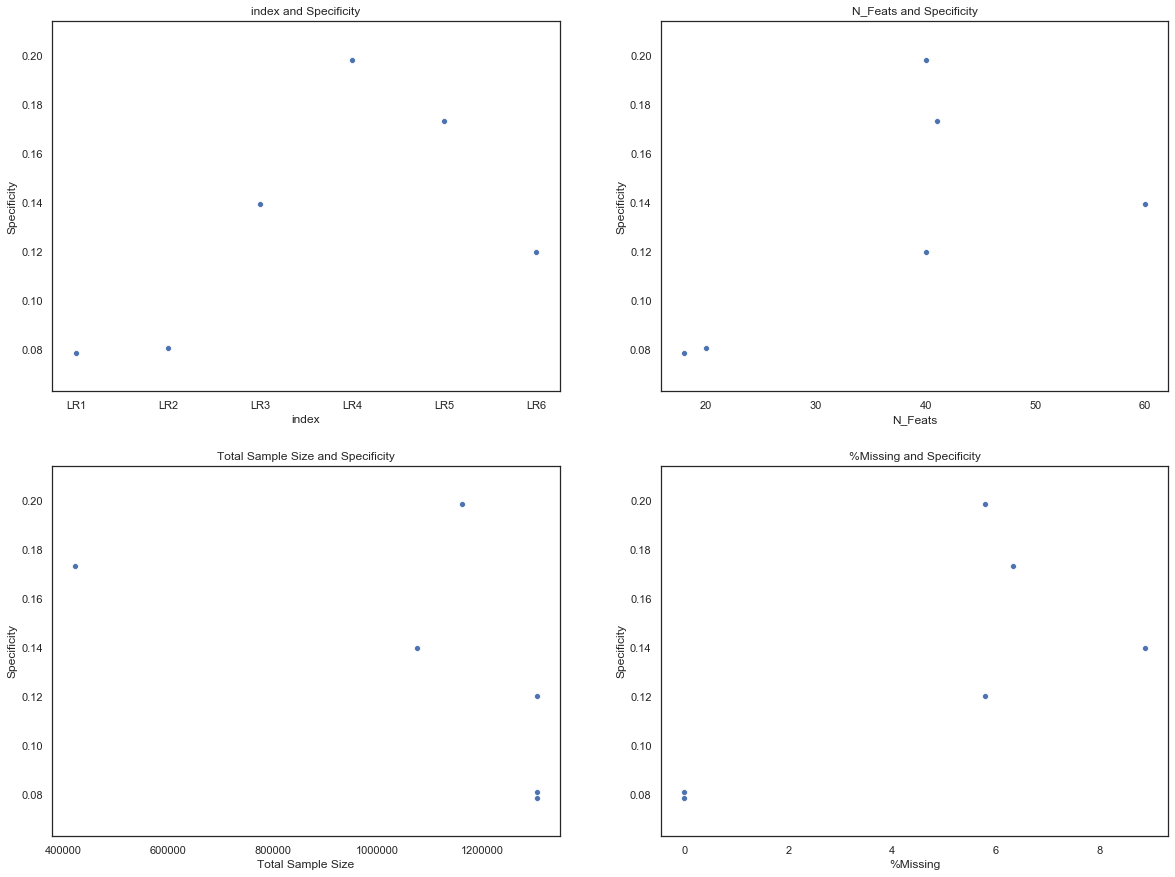

In [273]:
#plot results 

plt.figure(figsize=(20,15))

cols = ['index', 'N_Feats', 'Total Sample Size', '%Missing']

for i in range(len(cols)):
    
    plt.subplot(2,2,i+1)

    sns.scatterplot(x=cols[i], y='Specificity', data=table)

    plt.title('{} and Specificity'.format(cols[i]))

plt.show()

### Things learned from feature engineering

+ Drop missing outperforms replacing by median 
+ No overfitting issue and no need for regularization because only 40 features for 1M+ records
+ Three variables 'dti', 'pub_rec_bankruptcies', 'revol_util' contribute to higher specificity
+ Adding job title doesn't improve model performance and it's expensive to run

# Create Training and Test Sets

In [506]:
feat = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
        'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
        'grade_ord', 'verification_status', 'application_type', 'addr_state', 
        'delinq_amnt', 'delinq_2yrs', 'annual_inc',
       
        'region', 'inq_last_6mths',
      
        'tax_liens', 
        'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
        
        'dti', 'pub_rec_bankruptcies', 'revol_util', 
      
        #'total_bc_limit',
       
        #'num_tl_op_past_12m',
        #'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_op_rev_tl', 'num_il_tl',
        'num_bc_tl', 'num_actv_bc_tl', 'mo_sin_rcnt_tl',
        'num_tl_90g_dpd_24m', 'num_actv_rev_tl',
        'tot_cur_bal', 'tot_coll_amt',
        'num_accts_ever_120_pd', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op',
        'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
        'emp_len_ord'
        
       #'mo_sin_old_il_acct', 'num_tl_120dpd_2m'
        ]

var  = ['acc_now_delinq', 'total_acc', 'term', 'sub_grade_ord', 'revol_bal', 
        'purpose', 'pub_rec', 'open_acc', 'loan_amnt', 'int_rate', 'home_ownership', 
        'grade_ord', 'verification_status', 'application_type', 'addr_state', 
        'delinq_amnt', 'delinq_2yrs', 'annual_inc',
       
        'region', 'inq_last_6mths',
      
        'tax_liens', 
        'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
        
        'dti', 'pub_rec_bankruptcies', 'revol_util', 
      
        #'total_bc_limit',
       
        #'num_tl_op_past_12m',
        #'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_op_rev_tl', 'num_il_tl',
        'num_bc_tl', 'num_actv_bc_tl', 'mo_sin_rcnt_tl',
        'num_tl_90g_dpd_24m', 'num_actv_rev_tl',
        'tot_cur_bal', 'tot_coll_amt',
        'num_accts_ever_120_pd', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op',
        'mo_sin_old_rev_tl_op', 'avg_cur_bal', 'pct_tl_nvr_dlq',
        'emp_len_ord',
        
        'target'
        
       #'mo_sin_old_il_acct', 'num_tl_120dpd_2m'
        ]

In [507]:
lc3 = pd.DataFrame(lc2[var])

lc3 = lc3.dropna()

#lc3.info()

### use lc3 for vars with missing

X = pd.get_dummies(lc3[feat], drop_first = True)

y = pd.DataFrame(lc3['target'], columns = ['target'])

In [508]:
###### split into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Train Set Size is {}.'.format(X_train.shape[0]))
print('Test Set Size is {}.'.format(X_test.shape[0]))

Train Set Size is 813265.
Test Set Size is 348543.


# Build Models

## Logistic Regression

In [723]:
#scaling 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaler.append('MinMax')

In [725]:
#scaling 2 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaler.append('Standard')

In [ ]:
#hyperparameter table components 

#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_train, sen_test, spe_train, spe_test, f1_train, f1_test, \
Scaler, C, weight, n_est, depth, n_split, model = [], [], [], [], [], [], [], [], [], [], [] ,[], [], [] ,[]

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight_values = [None, 'balanced']

    
for c, class_weight in itertools.product(c_values, class_weight_values): 

    
    lr = lr.fit(X_train, y_train)

    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)

    accu_train = lr.score(X_train, y_train)
    accu_test = lr.score(X_test, y_test)

#confusion matrix for train set 

    conf_matrix_train = confusion_matrix(y_train, pred_train)

    TP_train = conf_matrix_train[1][1]
    TN_train = conf_matrix_train[0][0]
    FP_train = conf_matrix_train[0][1]
    FN_train = conf_matrix_train[1][0]

#calculate accuracy
    conf_accuracy_train = (float(TP_train+ TN_train) / 
                      float(TP_train+ TN_train+ FP_train+ FN_train))

#calculate mis-classification
    conf_misclassification_train = 1 - conf_accuracy_train

#calculate sensitivity, recall, hit rate, or true positive rate
    conf_sensitivity_train = (TP_train/ float(TP_train+ FN_train))

#calculate specificity or true negative rate
    conf_specificity_train = (TN_train/ float(TN_train+ FP_train))

#calculate precision
    conf_precision_train = (TP_train/ float(TP_train+ FP_train))

#calculate f1-score
    conf_f1_train = (2 * conf_sensitivity_train * conf_precision_train) / \
                    (conf_sensitivity_train + conf_precision_train)
    
#calculate typeI error
    conf_type1_train = (float(FP_train))


#confusion matrix for test set 

    conf_matrix_test = confusion_matrix(y_test, pred_test)

    TP_test = conf_matrix_test[1][1]
    TN_test = conf_matrix_test[0][0]
    FP_test = conf_matrix_test[0][1]
    FN_test = conf_matrix_test[1][0]

#calculate accuracy
    conf_accuracy_test = (float(TP_test + TN_test) / 
                          float(TP_test + TN_test + FP_test + FN_test))

#calculate mis-classification
    conf_misclassification_test = 1 - conf_accuracy_test

#calculate sensitivity, recall, hit rate, or true positive rate
    conf_sensitivity_test = (TP_test / float(TP_test + FN_test))

#calculate specificity or true negative rate
    conf_specificity_test = (TN_test / float(TN_test + FP_test))

#calculate precision
    conf_precision_test = (TP_test / float(TP_test + FP_test))

#calculate f1-score
    conf_f1_test = (2 * conf_sensitivity_test * conf_precision_test) / \
                   (conf_sensitivity_test + conf_precision_test)
    
#calculate typeI error
    conf_type1_test = (float(FP_test))


#get results 
    Accu_train.append(accu_train)
    Accu_test.append(accu_test)
    sen_train.append(conf_sensitivity_train)
    sen_test.append(conf_sensitivity_test)
    spe_train.append(conf_specificity_train)
    spe_test.append(conf_specificity_test)
    f1_train.append(conf_f1_train)
    f1_test.append(conf_f1_test)

    model.append('Logistic Regression')
    
    C.append(c)
    weight.append(class_weight)
    n_est.append('NA')
    depth.append('NA')
    n_split.append('NA')


    data = {'Model'             : model,
            'Accu_Train'        : Accu_train,
            'Accu_Test'         : Accu_test,
            'Sen_Train'         : sen_train,
            'Sen_Test'          : sen_test,
            'Spe_Train'         : spe_train, 
            'Spe_Test'          : spe_test,
            'F1_Train'          : f1_train, 
            'F1_Test'           : f1_test,
       
            'Scaler'            : Scaler,
            
            'C'                 : C, 
            'Class_Weight'      : weight,
        
            'N_Estimators'      : n_est,
            'Max_Depth'         : depth,
            'Min_Samples_Split' : n_split
           }

    lr = pd.DataFrame(data=data)

    lr.to_csv('results.csv', mode='a', header=False)

## Decision Tree

In [727]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaler.append('MinMax')

In [525]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaler.append('Standard')

In [606]:
#hyperparameter table components 

#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_train, sen_test, spe_train, spe_test, f1_train, f1_test, \
Scaler, C, weight, n_est, depth, n_split, model = [], [], [], [], [], [], [], [], [], [], [] ,[], [], [] ,[]

# model 2: decision tree

# as logistic regression results indicate, class_weight='balanced' performs better

max_depth_values = [5, 8, 15, 25, 30] 

min_samples_split_values = [2, 5, 10, 15, 100]
    
for max_depth, min_samples_split in itertools.product(max_depth_values,
                                                      min_samples_split_values): 
    

    dtc = DecisionTreeClassifier(class_weight='balanced',
                                 max_depth=max_depth, 
                                 min_samples_split=min_samples_split)

    dtc = dtc.fit(X_train, y_train)

    pred_train = dtc.predict(X_train)
    pred_test = dtc.predict(X_test)

    accu_train = dtc.score(X_train, y_train)
    accu_test = dtc.score(X_test, y_test)

#confusion matrix for train set 

    conf_matrix_train = confusion_matrix(y_train, pred_train)

    TP_train = conf_matrix_train[1][1]
    TN_train = conf_matrix_train[0][0]
    FP_train = conf_matrix_train[0][1]
    FN_train = conf_matrix_train[1][0]

#calculate accuracy
    conf_accuracy_train = (float(TP_train+ TN_train) / \
                           float(TP_train+ TN_train+ FP_train+ FN_train))

#calculate mis-classification
    conf_misclassification_train = 1 - conf_accuracy_train

#calculate sensitivity, recall, hit rate, or true positive rate 
    conf_sensitivity_train = (TP_train/ float(TP_train+ FN_train))

#calculate specificity or true negative rate
    conf_specificity_train = (TN_train/ float(TN_train+ FP_train))

#calculate precision
    conf_precision_train = (TP_train/ float(TP_train+ FP_train))

#calculate f1-score
    conf_f1_train = (2 * conf_sensitivity_train * conf_precision_train) / \
                    (conf_sensitivity_train + conf_precision_train)
    
#calculate typeI error
    conf_type1_train = (float(FP_train))


#confusion matrix for test set 

    conf_matrix_test = confusion_matrix(y_test, pred_test)

    TP_test = conf_matrix_test[1][1]
    TN_test = conf_matrix_test[0][0]
    FP_test = conf_matrix_test[0][1]
    FN_test = conf_matrix_test[1][0]

#calculate accuracy
    conf_accuracy_test = (float(TP_test + TN_test) / 
                          float(TP_test + TN_test + FP_test + FN_test))

#calculate mis-classification
    conf_misclassification_test = 1 - conf_accuracy_test

#calculate sensitivity, recall, hit rate, or true positive rate
    conf_sensitivity_test = (TP_test / float(TP_test + FN_test))

#calculate specificity or true negative rate
    conf_specificity_test = (TN_test / float(TN_test + FP_test))

#calculate precision
    conf_precision_test = (TP_test / float(TP_test + FP_test))

#calculate f1-score
    conf_f1_test = (2 * conf_sensitivity_test * conf_precision_test) / \
                   (conf_sensitivity_test + conf_precision_test)
    
#calculate typeI error
    conf_type1_test = (float(FP_test))


#get results 
    Accu_train.append(accu_train)
    Accu_test.append(accu_test)
    sen_train.append(conf_sensitivity_train)
    sen_test.append(conf_sensitivity_test)
    spe_train.append(conf_specificity_train)
    spe_test.append(conf_specificity_test)
    f1_train.append(conf_f1_train)
    f1_test.append(conf_f1_test)

    model.append('Decision Tree')
    
    C.append('NA')
    weight.append('Balanced')
    n_est.append('NA')
    depth.append(max_depth)
    n_split.append(min_samples_split)


    data = {'Model'             : model,
            'Accu_Train'        : Accu_train,
            'Accu_Test'         : Accu_test,
            'Sen_Train'         : sen_train,
            'Sen_Test'          : sen_test,
            'Spe_Train'         : spe_train, 
            'Spe_Test'          : spe_test,
            'F1_Train'          : f1_train, 
            'F1_Test'           : f1_test,
       
            'Scaler'            : Scaler,
            'C'                 : C, 
            'Class_Weight'      : weight,
        
            'N_Estimators'      : n_est,
            'Max_Depth'         : depth,
            'Min_Samples_Split' : n_split
           }

    dtc = pd.DataFrame(data=data)
    dtc.to_csv('results.csv', mode='a', header=False)

## Random Forest

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaler.append('MinMax')

In [583]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaler.append('Standard')

In [577]:
## hyperparameter table components 

#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_train, sen_test, spe_train, spe_test, f1_train, f1_test, \
Scaler, C, weight, n_est, depth, n_split, model = [], [], [], [], [], [], [], [], [], [], [] ,[], [], [] ,[]


n_estimators_values = [10, 50, 100, 150, 200]

max_depth_values = [5, 8, 15, 25, 30] 

min_samples_split_values = [2, 5, 10, 15, 100]


from sklearn import ensemble
    
for class_weight, n_estimators, max_depth, min_samples_split in itertools.product(
                                                                    n_estimators_values, 
                                                                    max_depth_values,
                                                                    min_samples_split_values): 
 

    rfc = ensemble.RandomForestClassifier(class_weight='balanced',
                                          n_estimators=n_estimators
                                          max_depth=max_depth
                                          min_samples_split=min_samples_split)

    rfc = rfc.fit(X_train, y_train)   

    pred_train = rfc.predict(X_train)
    pred_test = rfc.predict(X_test)

    accu_train = rfc.score(X_train, y_train)
    accu_test = rfc.score(X_test, y_test)

#confusion matrix for train set 

    conf_matrix_train = confusion_matrix(y_train, pred_train)

    TP_train = conf_matrix_train[1][1]
    TN_train = conf_matrix_train[0][0]
    FP_train = conf_matrix_train[0][1]
    FN_train = conf_matrix_train[1][0]

#calculate accuracy
    conf_accuracy_train = (float(TP_train + TN_train) / 
                      float(TP_train + TN_train + FP_train + FN_train))

#calculate mis-classification
    conf_misclassification_train = 1 - conf_accuracy_train

#calculate sensitivity, recall, hit rate, or true positive rate 
    conf_sensitivity_train = (TP_train / float(TP_train + FN_train))

#calculate specificity or true negative rate
    conf_specificity_train = (TN_train / float(TN_train + FP_train))

#calculate precision
    conf_precision_train = (TP_train / float(TP_train + FP_train))

#calculate f1-score
    conf_f1_train = (2 * conf_sensitivity_train * conf_precision_train) / \
                    (conf_sensitivity_train + conf_precision_train)
    
#calculate typeI error
    conf_type1_train = (float(FP_train))


#confusion matrix for test set 

    conf_matrix_test = confusion_matrix(y_test, pred_test)

    TP_test = conf_matrix_test[1][1]
    TN_test = conf_matrix_test[0][0]
    FP_test = conf_matrix_test[0][1]
    FN_test = conf_matrix_test[1][0]

#calculate accuracy
    conf_accuracy_test = (float(TP_test + TN_test) / 
                          float(TP_test + TN_test + FP_test + FN_test))

#calculate mis-classification
    conf_misclassification_test = 1 - conf_accuracy_test

#calculate sensitivity, recall, hit rate, or true positive rate
    conf_sensitivity_test = (TP_test / float(TP_test + FN_test))

#calculate specificity or true negative rate
    conf_specificity_test = (TN_test / float(TN_test + FP_test))

#calculate precision
    conf_precision_test = (TP_test / float(TP_test + FP_test))

#calculate f1-score
    conf_f1_test = (2 * conf_sensitivity_test * conf_precision_test) / \
                   (conf_sensitivity_test + conf_precision_test)
    
#calculate typeI error
    conf_type1_test = (float(FP_test))


#get results 
    Accu_train.append(accu_train)
    Accu_test.append(accu_test)
    sen_train.append(conf_sensitivity_train)
    sen_test.append(conf_sensitivity_test)
    spe_train.append(conf_specificity_train)
    spe_test.append(conf_specificity_test)
    f1_train.append(conf_f1_train)
    f1_test.append(conf_f1_test)

    model.append('Random Forest')
    
    C.append('NA')
    weight.append('Balanced')
    n_est.append(n_estimators)
    depth.append(max_depth)
    n_split.append(min_samples_split)


    data = {'Model'             : model,
            'Accu_Train'        : Accu_train,
            'Accu_Test'         : Accu_test,
            'Sen_Train'         : sen_train,
            'Sen_Test'          : sen_test,
            'Spe_Train'         : spe_train, 
            'Spe_Test'          : spe_test,
            'F1_Train'          : f1_train, 
            'F1_Test'           : f1_test,
       
            'Scaler'            : Scaler,
            'C'                 : C, 
            'Class_Weight'      : weight,
        
            'N_Estimators'      : n_est,
            'Max_Depth'         : depth,
            'Min_Samples_Split' : n_split
           }

    rfc = pd.DataFrame(data=data)
    
#append new results to existing csv file
    rfc.to_csv('results.csv', mode='a', header=False)

## Boosting Model

In [591]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaler.append('MinMax')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Scaler.append('Standard')

In [ ]:
## hyperparameter table components 

#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_train, sen_test, spe_train, spe_test, f1_train, f1_test, \
Scaler, C, weight, n_est, depth, n_split, model = [], [], [], [], [], [], [], [], [], [], [] ,[], [], [] ,[]

n_estimators_values = [50, 100] #default=100

max_depth_values = [3, 5, 8, 10] #default=3

min_samples_split_values = [2, 5, 10, 15, 100]

    
for max_depth, min_samples_split in itertools.product(max_depth_values, min_samples_split_values): 
 

    gbc = ensemble.GradientBoostingClassifier(n_estimators = n_estimators
                                              max_depth = max_depth
                                              min_samples_split = min_samples_split)


    gbc = gbc.fit(X_train, y_train)   

    pred_train = gbc.predict(X_train)
    pred_test = gbc.predict(X_test)

    accu_train = gbc.score(X_train, y_train)
    accu_test = gbc.score(X_test, y_test)

#confusion matrix for train set 

    conf_matrix_train = confusion_matrix(y_train, pred_train)

    TP_train = conf_matrix_train[1][1]
    TN_train = conf_matrix_train[0][0]
    FP_train = conf_matrix_train[0][1]
    FN_train = conf_matrix_train[1][0]

#calculate accuracy
    conf_accuracy_train = (float(TP_train + TN_train) / 
                      float(TP_train + TN_train + FP_train + FN_train))

#calculate mis-classification
    conf_misclassification_train = 1 - conf_accuracy_train

#calculate sensitivity, recall, hit rate, or true positive rate 
    conf_sensitivity_train = (TP_train / float(TP_train + FN_train))

#calculate specificity or true negative rate
    conf_specificity_train = (TN_train / float(TN_train + FP_train))

#calculate precision
    conf_precision_train = (TP_train / float(TP_train + FP_train))

#calculate f1-score
    conf_f1_train = (2 * conf_sensitivity_train * conf_precision_train) / \
                    (conf_sensitivity_train + conf_precision_train)
    
#calculate typeI error
    conf_type1_train = (float(FP_train))


#confusion matrix for test set 

    conf_matrix_test = confusion_matrix(y_test, pred_test)

    TP_test = conf_matrix_test[1][1]
    TN_test = conf_matrix_test[0][0]
    FP_test = conf_matrix_test[0][1]
    FN_test = conf_matrix_test[1][0]

#calculate accuracy
    conf_accuracy_test = (float(TP_test + TN_test) / 
                          float(TP_test + TN_test + FP_test + FN_test))

#calculate mis-classification
    conf_misclassification_test = 1 - conf_accuracy_test

#calculate sensitivity, recall, hit rate, or true positive rate
    conf_sensitivity_test = (TP_test / float(TP_test + FN_test))

#calculate specificity or true negative rate
    conf_specificity_test = (TN_test / float(TN_test + FP_test))

#calculate precision
    conf_precision_test = (TP_test / float(TP_test + FP_test))

#calculate f1-score
    conf_f1_test = (2 * conf_sensitivity_test * conf_precision_test) / \
                   (conf_sensitivity_test + conf_precision_test)
    
#calculate typeI error
    conf_type1_test = (float(FP_test))


#get results 
    Accu_train.append(accu_train)
    Accu_test.append(accu_test)
    sen_train.append(conf_sensitivity_train)
    sen_test.append(conf_sensitivity_test)
    spe_train.append(conf_specificity_train)
    spe_test.append(conf_specificity_test)
    f1_train.append(conf_f1_train)
    f1_test.append(conf_f1_test)

    model.append('Gradient Boosting')
    
    C.append('NA')
    weight.append('NA')
    n_est.append(n_estimators)
    depth.append(max_depth)
    n_split.append(min_samples_split)


    data = {'Model'             : model,
            'Accu_Train'        : Accu_train,
            'Accu_Test'         : Accu_test,
            'Sen_Train'         : sen_train,
            'Sen_Test'          : sen_test,
            'Spe_Train'         : spe_train, 
            'Spe_Test'          : spe_test,
            'F1_Train'          : f1_train, 
            'F1_Test'           : f1_test,
       
            'Scaler'            : Scaler,
            'C'                 : C, 
            'Class_Weight'      : weight,
        
            'N_Estimators'      : n_est,
            'Max_Depth'         : depth,
            'Min_Samples_Split' : n_split
           }

    gbc = pd.DataFrame(data=data)
    
#append new results to existing csv file
    gbc.to_csv('results.csv', mode='a', header=False)

In [56]:
results = pd.read_csv('results.csv')

results = results.sort_values(['Spe_Test'], ascending=False)

results

,Model,Accu_Train,Accu_Test,Sen_Train,Sen_Test,Spe_Train,Spe_Test,F1_Train,F1_Test,Scaler,C,Class_Weight,N_Estimators,Max_Depth,Min_Samples_Split,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,Logistic Regression,0.665671,0.557323,0.670879,0.500030,0.644746,0.788782,0.762667984,0.644239,MinMax,1000.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Logistic Regression,0.665655,0.557320,0.670859,0.500030,0.644746,0.788767,0.762653944,0.644238,MinMax,100.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logistic Regression,0.665655,0.557320,0.670859,0.500030,0.644746,0.788767,0.762653944,0.644238,MinMax,100.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Logistic Regression,0.665706,0.557498,0.670930,0.500267,0.644715,0.788710,0.762700296,0.644438,MinMax,10.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Logistic Regression,0.665706,0.557498,0.670930,0.500267,0.644715,0.788710,0.762700296,0.644438,MinMax,10.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Logistic Regression,0.665706,0.557498,0.670930,0.500267,0.644715,0.788710,0.762700296,0.644438,MinMax,10.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Logistic Regression,0.665939,0.558456,0.671201,0.501634,0.644795,0.788016,0.762900076,0.645560,MinMax,1.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Logistic Regression,0.665939,0.558456,0.671201,0.501634,0.644795,0.788016,0.762900076,0.645560,MinMax,1.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Logistic Regression,0.665939,0.558456,0.671201,0.501634,0.644795,0.788016,0.762900076,0.645560,MinMax,1.000,Balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Hyperparameter Table

In [678]:
scaler_bi = []

for i in ht['Scaler']:
    if i == 'MinMax':
        scaler_bi.append(0)
        
    else: scaler_bi.append(1)
        
ht['Scaler_bi'] = scaler_bi
ht.head()

,Model,Accu_Train,Accu_Test,Sen_Train,Sen_Test,Spe_Train,Spe_Test,F1_Train,F1_Test,Scaler,C,Class_Weight,N_Estimators,Max_Depth,Min_Samples_Split,Scaler_bi
0,Logistic Regression,0.665671,0.557323,0.670879,0.500030,0.644746,0.788782,0.762667984,0.644239,MinMax,1000.0,Balanced,NaN,NaN,NaN,0
1,Logistic Regression,0.665655,0.557320,0.670859,0.500030,0.644746,0.788767,0.762653944,0.644238,MinMax,100.0,Balanced,NaN,NaN,NaN,0
2,Logistic Regression,0.665655,0.557320,0.670859,0.500030,0.644746,0.788767,0.762653944,0.644238,MinMax,100.0,Balanced,NaN,NaN,NaN,0
3,Logistic Regression,0.665706,0.557498,0.670930,0.500267,0.644715,0.788710,0.762700296,0.644438,MinMax,10.0,Balanced,NaN,NaN,NaN,0
4,Logistic Regression,0.665706,0.557498,0.670930,0.500267,0.644715,0.788710,0.762700296,0.644438,MinMax,10.0,Balanced,NaN,NaN,NaN,0


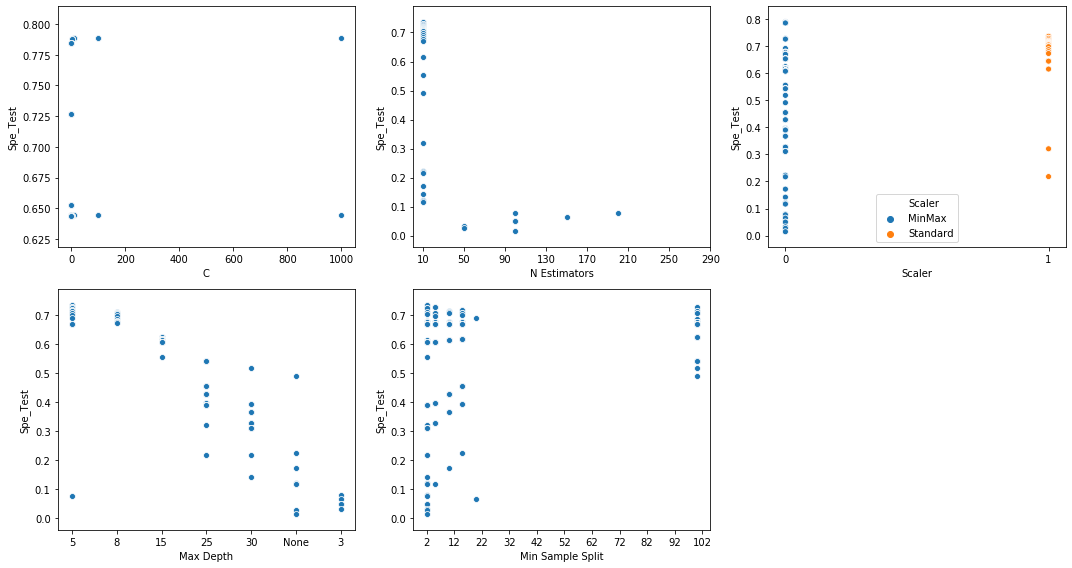

In [684]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)

sns.scatterplot(x='C', y='Spe_Test', data=ht)

plt.subplot(2,3,2)

sns.scatterplot(x='N_Estimators', y='Spe_Test', data=ht)

plt.xticks(range(10, 310, 40))
plt.xlabel('N Estimators')

plt.subplot(2,3,3)

sns.scatterplot(x='Scaler_bi', y='Spe_Test', hue='Scaler', data=ht)
plt.xticks(range(0,2,1))
plt.xlabel('Scaler')
plt.legend(loc='lower center')

plt.subplot(2,3,4)

sns.scatterplot(x='Max_Depth', y='Spe_Test', data=ht)
plt.xlabel('Max Depth')

plt.subplot(2,3,5)

sns.scatterplot(x='Min_Samples_Split', y='Spe_Test', data=ht)
plt.xticks(range(2,110, 10))
plt.xlabel('Min Sample Split')

plt.tight_layout()
plt.show()

## Final Model: Logistic Regression Model with the Highest Specificity 

In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
#hyperparameter table components 

#store results here
#mostly care about specificity of the test set, correctly predicting who won't pay off the loan

Accu_train, Accu_test, sen_train, sen_test, spe_train, spe_test, f1_train, f1_test, \
Scaler, C, weight, n_est, depth, n_split, model = [], [], [], [], [], [], [], [], [], [], [] ,[], [], [] ,[]

c_values = [1000]
    
for c in c_values: 
    
    lr = LogisticRegression(C = c, 
                            class_weight='balanced')

    
    lr = lr.fit(X_train, y_train)

    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)

    accu_train = lr.score(X_train, y_train)
    accu_test = lr.score(X_test, y_test)

#confusion matrix for train set 

    conf_matrix_train = confusion_matrix(y_train, pred_train)

    TP_train = conf_matrix_train[1][1]
    TN_train = conf_matrix_train[0][0]
    FP_train = conf_matrix_train[0][1]
    FN_train = conf_matrix_train[1][0]

#calculate accuracy
    conf_accuracy_train = (float(TP_train+ TN_train) / 
                      float(TP_train+ TN_train+ FP_train+ FN_train))

#calculate mis-classification
    conf_misclassification_train = 1 - conf_accuracy_train

#calculate sensitivity, recall, hit rate, or true positive rate
    conf_sensitivity_train = (TP_train / float(TP_train+ FN_train))

#calculate specificity or true negative rate
    conf_specificity_train = (TN_train / float(TN_train+ FP_train))

#calculate precision
    conf_precision_train = (TP_train / float(TP_train+ FP_train))

#calculate f1-score
    conf_f1_train = (2 * conf_sensitivity_train * conf_precision_train) / \
                    (conf_sensitivity_train + conf_precision_train)
    
#calculate typeI error
    conf_type1_train = (float(FP_train))


#confusion matrix for test set 

    conf_matrix_test = confusion_matrix(y_test, pred_test)

    TP_test = conf_matrix_test[1][1]
    TN_test = conf_matrix_test[0][0]
    FP_test = conf_matrix_test[0][1]
    FN_test = conf_matrix_test[1][0]

#calculate accuracy
    conf_accuracy_test = (float(TP_test + TN_test) / 
                          float(TP_test + TN_test + FP_test + FN_test))

#calculate mis-classification
    conf_misclassification_test = 1 - conf_accuracy_test

#calculate sensitivity, recall, hit rate, or true positive rate
    conf_sensitivity_test = (TP_test / float(TP_test + FN_test))

#calculate specificity or true negative rate
    conf_specificity_test = (TN_test / float(TN_test + FP_test))

#calculate precision
    conf_precision_test = (TP_test / float(TP_test + FP_test))

#calculate f1-score
    conf_f1_test = (2 * conf_sensitivity_test * conf_precision_test) / \
                   (conf_sensitivity_test + conf_precision_test)
    
#calculate typeI error
    conf_type1_test = (float(FP_test))


#get results 
    Accu_train.append(accu_train)
    Accu_test.append(accu_test)
    sen_train.append(conf_sensitivity_train)
    sen_test.append(conf_sensitivity_test)
    spe_train.append(conf_specificity_train)
    spe_test.append(conf_specificity_test)
    f1_train.append(conf_f1_train)
    f1_test.append(conf_f1_test)

    model.append('Logistic Regression')
    
    Scaler.append('MinMax')
    C.append(c)
    weight.append('Balanced')
    n_est.append('NA')
    depth.append('NA')
    n_split.append('NA')


    data = {'Model'             : model,
            'Accu_Train'        : Accu_train,
            'Accu_Test'         : Accu_test,
            'Sen_Train'         : sen_train,
            'Sen_Test'          : sen_test,
            'Spe_Train'         : spe_train, 
            'Spe_Test'          : spe_test,
            'F1_Train'          : f1_train, 
            'F1_Test'           : f1_test,
       
            'Scaler'            : Scaler,
            
            'C'                 : C, 
            'Class_Weight'      : weight,
        
            'N_Estimators'      : n_est,
            'Max_Depth'         : depth,
            'Min_Samples_Split' : n_split
           }

    LR = pd.DataFrame(data=data)

LR

,Model,Accu_Train,Accu_Test,Sen_Train,Sen_Test,Spe_Train,Spe_Test,F1_Train,F1_Test,Scaler,C,Class_Weight,N_Estimators,Max_Depth,Min_Samples_Split
0,Logistic Regression,0.665664,0.557228,0.670868,0.499891,0.644752,0.788869,0.762661,0.644126,MinMax,1000,Balanced,NA,NA,NA


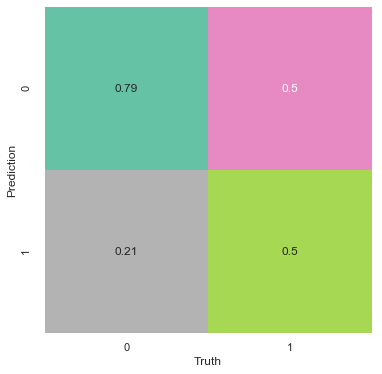

In [61]:
sns.set(font_scale=1, style='whitegrid')
fig, axes = plt.subplots(figsize=(6,6))
cm = confusion_matrix(y_test, pred_test).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True,  cmap='Set2_r', cbar=False)
ax.set_xlabel('Truth')
ax.set_ylabel('Prediction')
ax.axis('equal')

plt.show()

As we can see from the confunsion matrix, this model yields

+ Specificity (True Negative) of 0.79
+ Sensitivity (True Positive) of 0.5
+ Type I error (False Positive) of 0.21
+ Type II error (False Negative) of 0.5

In [65]:
coef_df = pd.DataFrame(lr.coef_)
coef_df = coef_df.transpose()

feat_df = pd.DataFrame(X.columns)

coeff = pd.concat([feat_df, coef_df], axis=1)

coeff.columns = ['Feature', 'Coef']

coeff['abs_coef'] = abs(coeff['Coef'])

coeff['exp_coef'] = np.exp(coeff['Coef'])

coeff['abs_exp_coef'] = abs(coeff['exp_coef'])

coeff = coeff.sort_values(['Coef'], ascending=False).round(2)

coeff.head()

,Feature,Coef,abs_coef,exp_coef,abs_exp_coef
3,revol_bal,8.12,8.12,3375.68,3375.68
24,tot_cur_bal,4.53,4.53,92.50,92.50
11,annual_inc,3.85,3.85,47.08,47.08
21,mo_sin_rcnt_tl,2.17,2.17,8.72,8.72
22,num_tl_90g_dpd_24m,1.80,1.80,6.06,6.06


In [67]:
top = pd.DataFrame(columns=['Feature', 'Coeff'])
end = pd.DataFrame(columns=['Feature', 'Coeff'])

top['Feature'] = coeff.head(5)['Feature']
top['Coeff'] = coeff.head(5)['Coef']
end['Feature'] = coeff.tail(5)['Feature']
end['Coeff'] = coeff.tail(5)['Coef']

fc = pd.concat([top, end])
fc

,Feature,Coeff
3,revol_bal,8.12
24,tot_cur_bal,4.53
11,annual_inc,3.85
21,mo_sin_rcnt_tl,2.17
22,num_tl_90g_dpd_24m,1.80
23,num_actv_rev_tl,-2.75
9,delinq_amnt,-2.92
2,sub_grade_ord,-3.64
4,pub_rec,-5.13
16,dti,-17.46


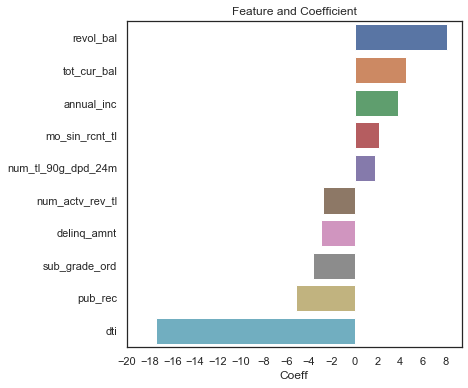

In [68]:
sns.set(style='white')
plt.figure(figsize=(6, 6))
sns.barplot(x='Coeff', y='Feature', data=fc)

plt.xticks(range(-20,10,2))
plt.ylabel('')
plt.title('Feature and Coefficient')

plt.show()

As we can see from the barplot, 

+ Revolving balance, total current balance, annual income, months since most recent installment accounts opened, and number of accounts 90 or more days past due in last 24 months are positively related to the likelihood a borrower paying off the loan.  

+ DTI, # derogatory public records, subgrade, the past-due amount owed for the accounts on which the borrower is now delinquent, and # currently active revolving trades are negatively related to the likelihood a borrow paying off the loan. 

+ DTI is the strongest predictor for paying off the loan. 

## Fit Random Guessing Model 

A random guessing model is defined assuming pay-off/default ratio is known. 

In [20]:
lc2['target'].value_counts()[0]/len(lc2['target'])

0.2007161667588468

In [21]:
lc2['target'].value_counts()[1]/len(lc2['target'])

0.7992838332411532

In [23]:
default_rate = lc2['target'].value_counts()[0] / len(lc2['target'])

print('Default rate is {}.'. format(default_rate))

Default rate is 0.2007161667588468.


In [38]:
random_predictions = np.random.rand(len(y_test)) < 1 - default_rate
random_predictions = pd.Series(random_predictions).astype('int').values

In [39]:
conf_matrix = confusion_matrix(y_test, random_predictions)

conf_matrix

array([[ 13811,  55345],
       [ 56147, 223240]])

In [40]:
print(classification_report(y_test, random_predictions))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20     69156
           1       0.80      0.80      0.80    279387

    accuracy                           0.68    348543
   macro avg       0.50      0.50      0.50    348543
weighted avg       0.68      0.68      0.68    348543



The specificity of a random guessing model is 0.2.

# Conclusion

As we can see from the analysis above, the logistic regression model outperforms other models and produces highest true negative rate of 0.79, which is four times better than random guess. In addition, this model uses those features available when borrower apply for a loan. Therefore, this model provides valuable information especially regarding whether the borrower will default, which helps investors make sound business decision. 

Even though this model yields satisfactory true negative rate and Type I error (false positive rate), I will improve current sensitivity (true positive rate) of 0.5 to make the model more profitable. 